# Notes

# Load Modules

In [1]:
library(dplyr)
library(tidyr)
library(scater)
library(Seurat)
library(cowplot)
library(harmony)
library(destiny)
library(monocle3)
library(TSCAN)
library(uwot)
library(slingshot)
library(mclust)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, 

# Load Data

In [ ]:
sim_data = readRDS("simulation_data_branch_non_linear_with_noise.rds")

In [ ]:
additional_meta_info = read.csv("simulation_nonlinear_ontrac_input.csv", row.names=1)
head(additional_meta_info)

,x,y,Niche_NTScore,Cell_NTScore,Ground_Truth,Cell_Type,Lineage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
cell1,0.1899555,0.7234187,0.199947601,0.19909275,0.3400232,I,3
cell2,0.8986162,0.8862130,0.004730517,0.04155392,0.2352948,A,1
cell3,0.1772525,0.5725945,0.487954636,0.44504909,0.4814236,I,3
cell4,0.9773162,0.2535936,0.886337997,0.89561595,0.7934621,G,2
cell5,0.9611189,0.9822358,0.002581361,0.01498122,0.1899959,A,1
cell6,0.2361229,0.8074413,0.101200513,0.10953713,0.2451217,I,3


In [4]:
sim_data@colData$Cell_Type = additional_meta_info$Cell_Type
sim_data@colData$x = additional_meta_info$x
sim_data@colData$y = additional_meta_info$y
sim_data@colData$lineage = additional_meta_info$Lineage
sim_data@colData$r = additional_meta_info$Ground_Truth
sim_data@colData$Cell_NTScore = additional_meta_info$Cell_NTScore

In [5]:
head(sim_data@colData)

DataFrame with 6 rows and 9 columns
        step_ix simulation_i  sim_time   Cell_Type         x         y
      <integer>    <integer> <numeric> <character> <numeric> <numeric>
cell1      1559           12  1096.024           I  0.189955  0.723419
cell2      4135           32   852.269           A  0.898616  0.886213
cell3      2014           16   437.938           I  0.177252  0.572594
cell4      1759           14   491.561           G  0.977316  0.253594
cell5      1368           11   475.762           A  0.961119  0.982236
cell6      3709           29   484.972           I  0.236123  0.807441
        lineage         r Cell_NTScore
      <integer> <numeric>    <numeric>
cell1         3  0.340023    0.1990927
cell2         1  0.235295    0.0415539
cell3         3  0.481424    0.4450491
cell4         2  0.793462    0.8956160
cell5         1  0.189996    0.0149812
cell6         3  0.245122    0.1095371

## raw data output

In [6]:
write.csv(sim_data@assays@data@listData$counts, "simulated_expression.csv")

# seurat obj

In [6]:
ss0 <- CreateSeuratObject(counts = sim_data@assays@data@listData$counts)


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [7]:
ss0@meta.data$sim_time <- sim_data@colData$sim_time
ss0@meta.data$Cell_Type <- sim_data@colData$Cell_Type
ss0@meta.data$x <- sim_data@colData$x
ss0@meta.data$y <- sim_data@colData$y
ss0@meta.data$lineage <- sim_data@colData$lineage
ss0@meta.data$r <- sim_data@colData$r
ss0@meta.data$Cell_NTScore <- sim_data@colData$Cell_NTScore

In [8]:
# ss0 <- NormalizeData(ss0)
ss0 <- FindVariableFeatures(ss0)
ss0 <- ScaleData(ss0)

Centering and scaling data matrix



In [9]:
ss0 <- RunPCA(ss0)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  G1-TF2, D12-TF2, D12-TF1, G1-TF1, D13-TF2, D12-TF3, D13-TF1, D14-TF1, G2-TF3, D7-TF1 
	   D8-TF1, D7-TF2, D14-TF2, G2-TF5, G4-TF1, G2-TF2, D3-TF1, G2-TF4, G4-TF3, G2-TF1 
	   G4-TF2, G5-TF1, C9-TF1, C6-TF2, D1-TF1, C11-TF1, G5-TF2, C9-TF2, C6-TF1, C10-TF2 
Negative:  C4-TF1, C4-TF2, D5-TF1, D5-TF2, C7-TF1, C7-TF2, C14-TF2, C12-TF1, C14-TF1, C13-TF1 
	   C12-TF2, E1-TF1, C3-TF1, F5-TF1, F3-TF1, F3-TF2, F3-TF3, E3-TF2, D6-TF1, F1-TF1 
	   E3-TF1, D9-TF1, D11-TF2, D10-TF1, D11-TF1, D9-TF2, E3-TF3, D2-TF1, A3-TF1, E5-TF1 
PC_ 2 
Positive:  D10-TF1, D9-TF2, D6-TF1, D11-TF2, F1-TF1, D11-TF1, D2-TF1, D9-TF1, F3-TF1, F3-TF2 
	   F3-TF3, F5-TF1, D5-TF2, D5-TF1, C10-TF1, C2-TF1, C6-TF1, C6-TF2, C10-TF2, C9-TF1 
	   C11-TF1, C8-TF1, D1-TF1, C9-TF2, C5-TF1, D8-TF1, E4-TF1, C8-TF3, B3-TF2, E2-TF1 
Negative:  D4-TF1, D4-TF2, F2

In [10]:
ss0 <- FindNeighbors(ss0, dims = 1:30, reduction = "pca")
ss0 <- FindClusters(ss0, resolution = 2, cluster.name = "unintegrated_clusters")

Computing nearest neighbor graph

Computing SNN

Warning message:
“The following arguments are not used: cluster.name”
Warning message:
“The following arguments are not used: cluster.name”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 500
Number of edges: 15574

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6328
Number of communities: 11
Elapsed time: 0 seconds


In [11]:
ss0 <- RunUMAP(ss0, dims = 1:30, reduction = "pca", reduction.name = "umap")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:51:51 UMAP embedding parameters a = 0.9922 b = 1.112

10:51:51 Read 500 rows and found 30 numeric columns

10:51:51 Using Annoy for neighbor search, n_neighbors = 30

10:51:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:51:51 Writing NN index file to temp file /tmp/Rtmp0B2R11/file2d21f85025ac3d

10:51:51 Searching Annoy index using 1 thread, search_k = 3000

10:51:51 Annoy recall = 100%

10:51:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [12]:
head(ss0@reductions$umap@cell.embeddings)

,UMAP_1,UMAP_2
cell1,9.489218,-2.486439
cell2,2.848627,7.153874
cell3,1.559174,1.185150
cell4,-4.283710,-7.551551
cell5,2.145237,6.179404
cell6,9.351389,-3.479003


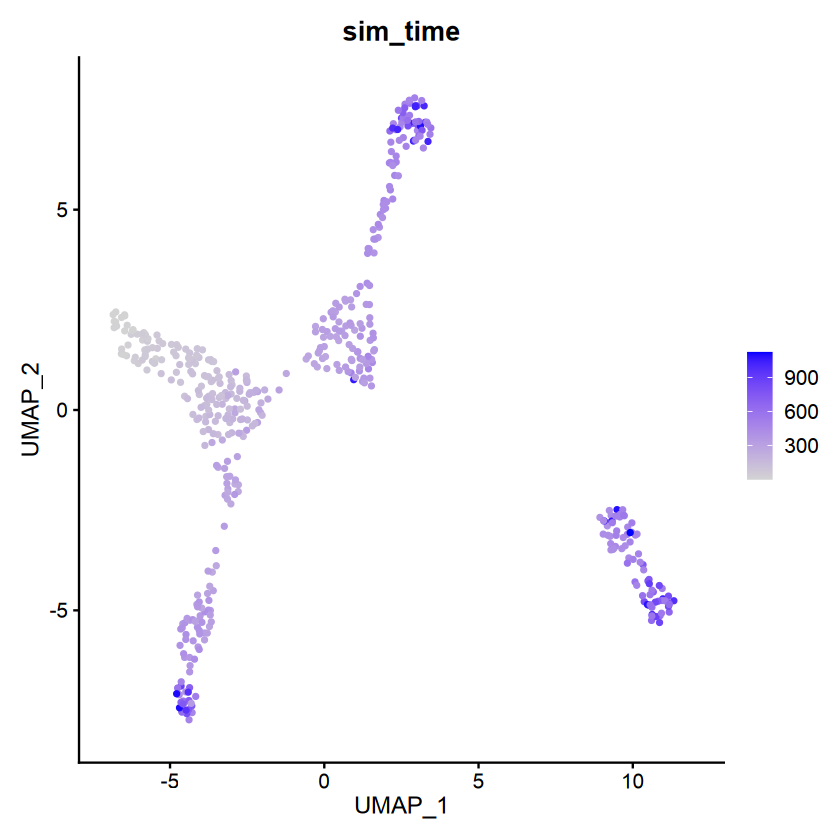

In [13]:
FeaturePlot(ss0, features = c("sim_time"), reduction = "umap")

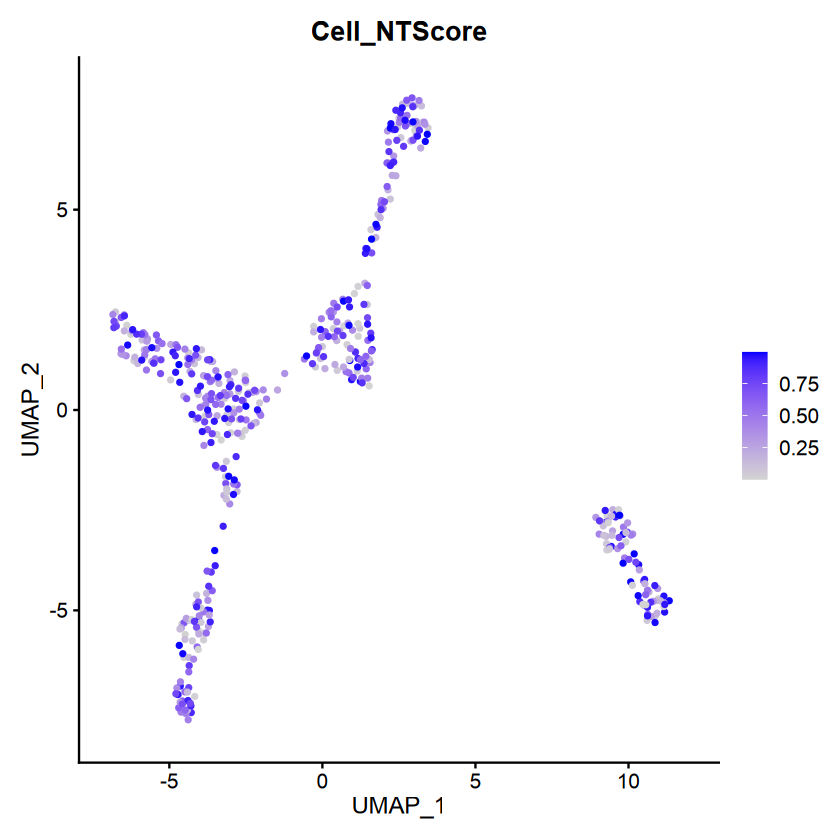

In [14]:
FeaturePlot(ss0, features = c("Cell_NTScore"), reduction = "umap")

In [15]:
root.use <- rownames(ss0@meta.data[ss0@meta.data$sim_time==min(ss0@meta.data$sim_time),])


In [16]:
ss0@meta.data$sim_time_rank <- rank(ss0@meta.data$sim_time,ties.method = 'random', na.last = 'keep')
ss0@meta.data$sim_time_norm <- scales::rescale(ss0@meta.data$sim_time_rank,to = c(0,1))


# DPT

In [17]:
dm.use <- DiffusionMap(data = sim_data)

Warning message in (function (data, k, ..., query = NULL, distance = c("euclidean", :
“find_knn does not yet support sparse matrices, converting data to a dense matrix.”
Warning message:
“'as(<dsCMatrix>, "dsTMatrix")' is deprecated.
Use 'as(., "TsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").”


In [18]:
ss0[['dmap']] <- CreateDimReducObject(embeddings = dm.use@eigenvectors,assay = 'RNA',stdev = dm.use@eigenvalues,key = 'DC_')


In [19]:
dpt.use <- DPT(dm.use,tips = match(root.use,rownames(dm.use@eigenvectors)))
dpt_rank <- rank(dpt.use$dpt,ties.method = 'random', na.last = 'keep')
ss0@meta.data$dpt_norm <- scales::rescale(dpt_rank,to = c(0,1))
ss0@meta.data$dpt = dpt.use$dpt


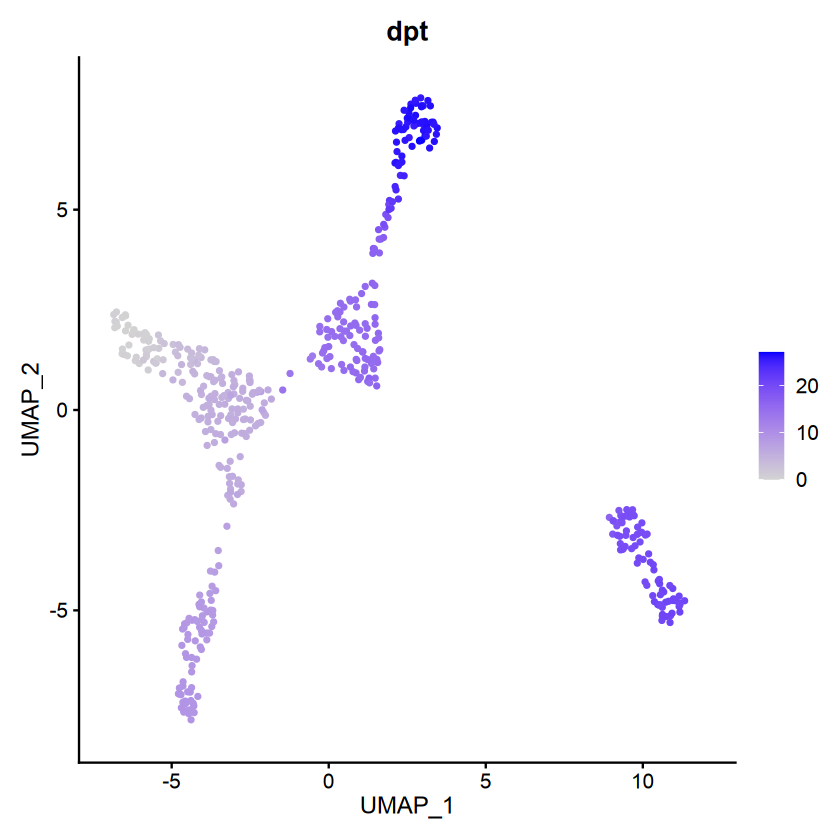

In [20]:
FeaturePlot(ss0, features = c("dpt"), reduction = "umap")


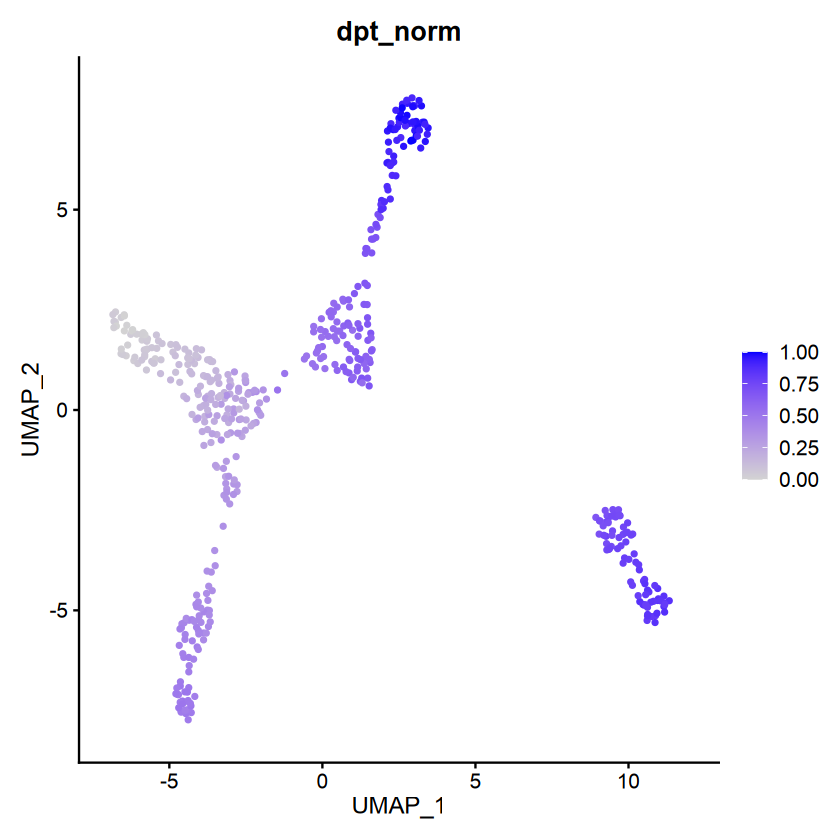

In [21]:
FeaturePlot(ss0, features = c("dpt_norm"), reduction = "umap")


# monocle

In [22]:
gene_annotation <- as.data.frame(sim_data@assays@data@listData$counts@Dimnames[[1]], row.names = sim_data@assays@data@listData$counts@Dimnames[[1]])
colnames(gene_annotation) <- "gene_short_name"

cds <- new_cell_data_set(sim_data@assays@data@listData$counts,
                         cell_metadata = sim_data@colData,
                         gene_metadata = gene_annotation)

In [23]:
cds <- preprocess_cds(cds, method = "PCA", num_dim = 20)

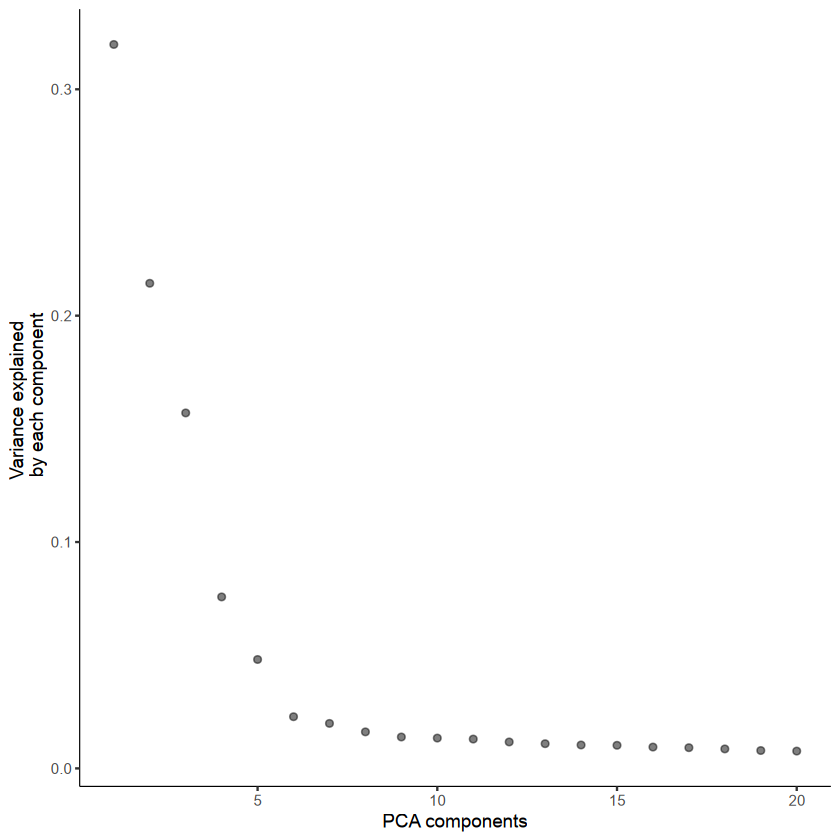

In [24]:
plot_pc_variance_explained(cds)

In [25]:
cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA")


No trajectory to plot. Has learn_graph() been called yet?

Cells aren't colored in a way that allows them to be grouped.



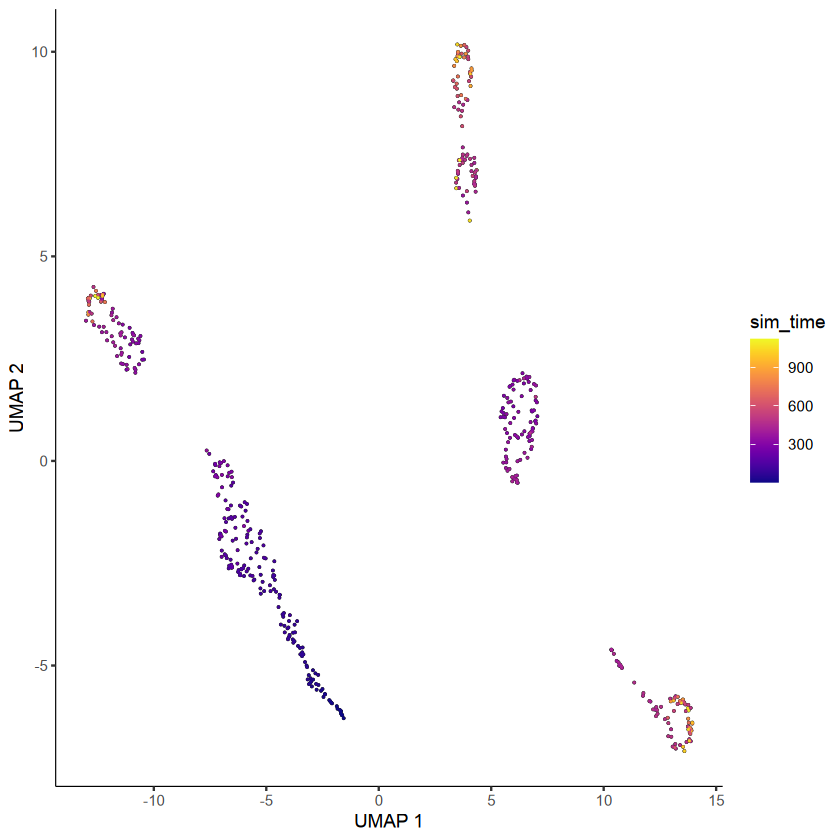

In [26]:
plot_cells(cds, label_groups_by_cluster=FALSE,  color_cells_by = "sim_time")

In [27]:
cds <- cluster_cells(cds, reduction_method = "UMAP")

No trajectory to plot. Has learn_graph() been called yet?



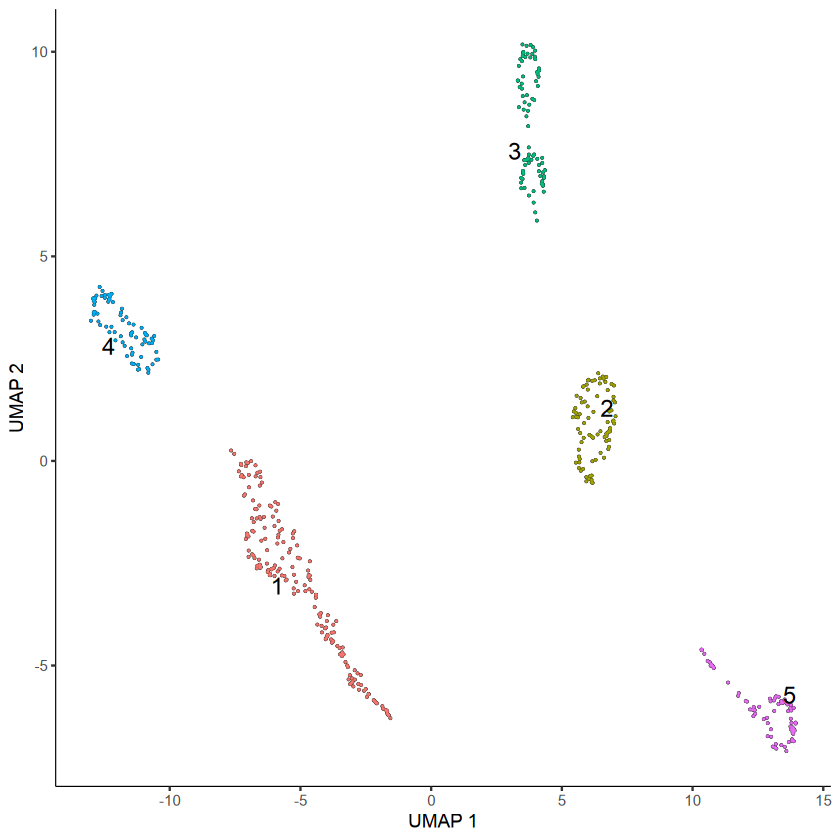

In [28]:
plot_cells(cds, reduction_method = "UMAP", color_cells_by = 'cluster', group_label_size = 5)     

In [29]:
cds <- learn_graph(cds, use_partition=TRUE)

  |======================================================================| 100%


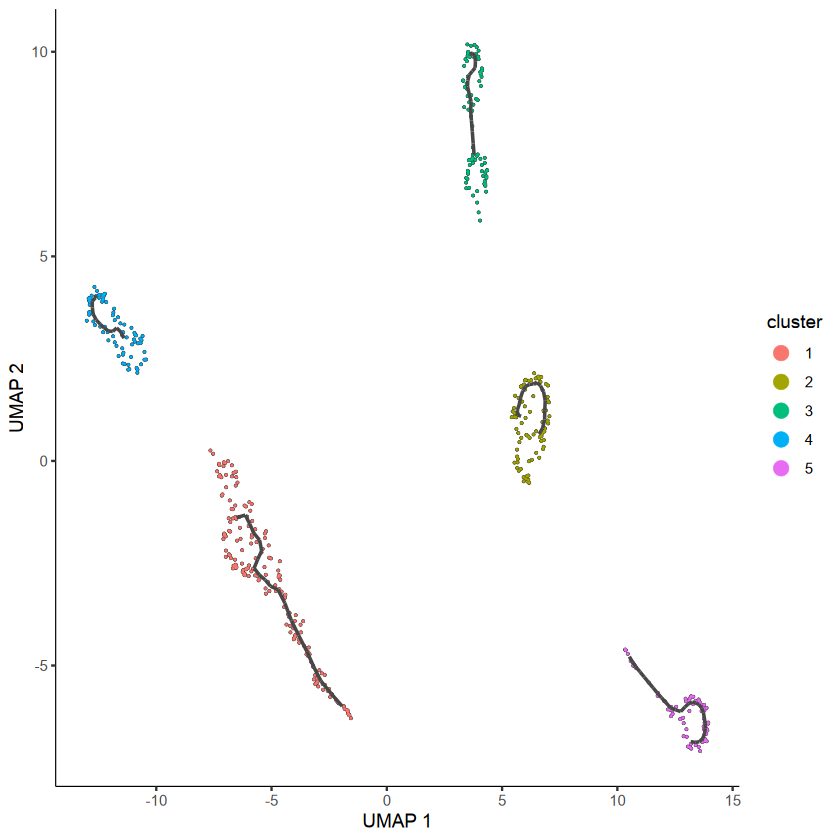

In [30]:
# visualise the learned trajectory
plot_cells(cds,
           # color_cells_by = "Cell_Type",
           label_cell_groups=FALSE,
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

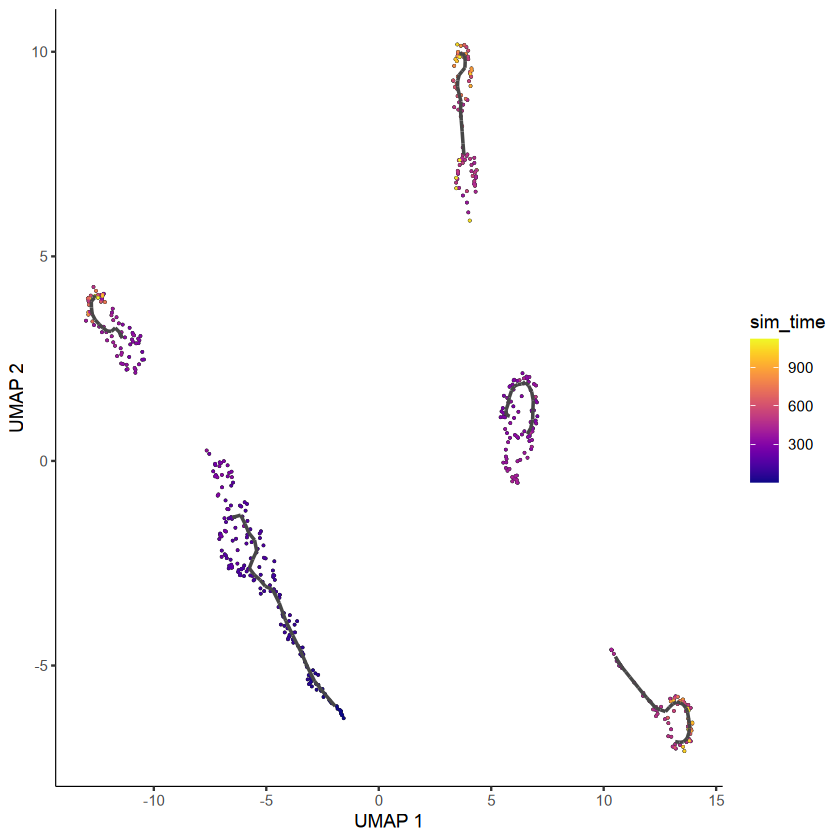

In [31]:
# visualise the learned trajectory
plot_cells(cds,
           color_cells_by = "sim_time",
           label_cell_groups=FALSE,
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

In [32]:
cds <- order_cells(cds, root_cells=root.use)

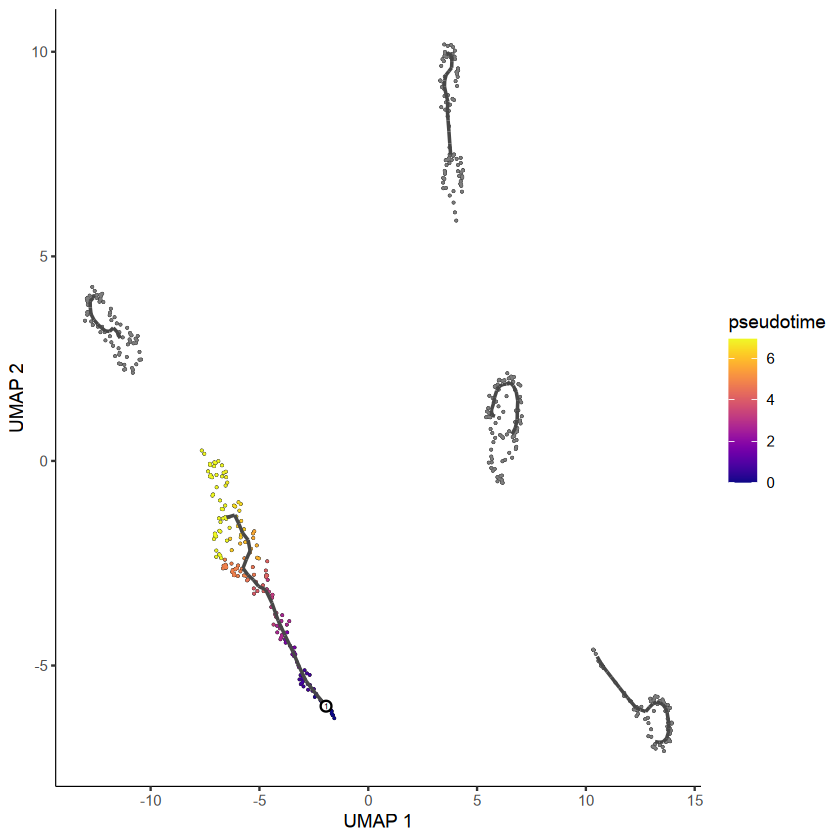

In [33]:
plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

In [34]:
pseudotime <- pseudotime(cds) 

In [35]:
monocle3_rank <- rank(pseudotime,ties.method = 'random', na.last = 'keep')
monocle3_norm <- scales::rescale(monocle3_rank,to = c(0,1))

In [36]:
ss0@meta.data$monocle3_norm <- monocle3_norm
ss0@meta.data$monocle3 <- pseudotime

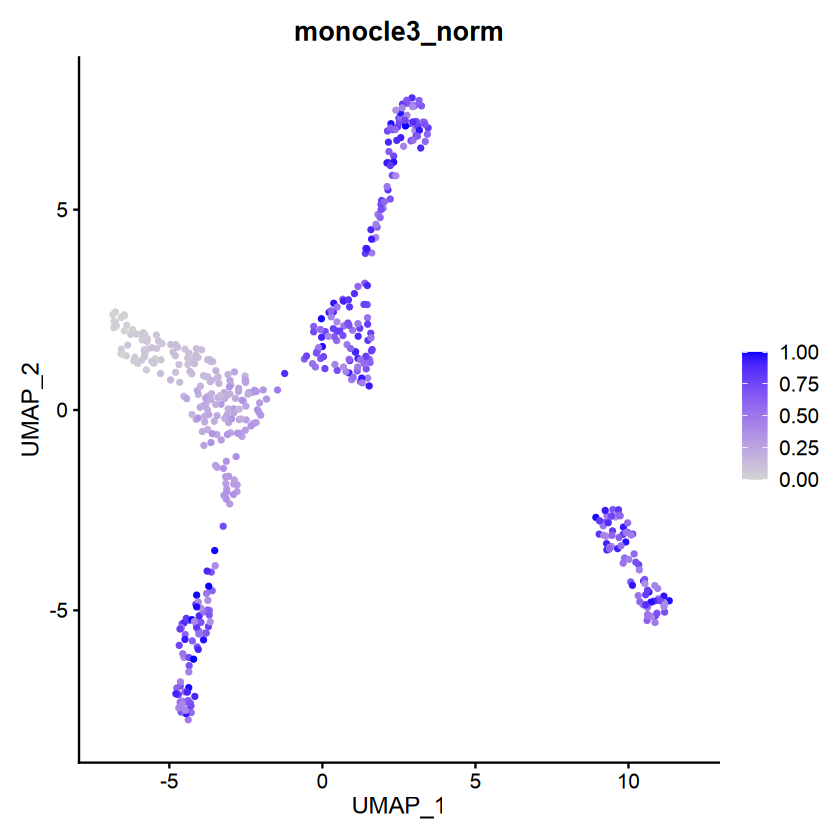

In [37]:
FeaturePlot(ss0, features = c("monocle3_norm"), reduction = "umap")

# TSCAN

In [38]:
exp <- as.matrix(ss0@assays$RNA@data)
procdata <- preprocess(exp, minexpr_value = 0, minexpr_percent = 0.001, cvcutoff = 0.01)


In [39]:
lpsmclust <- exprmclust(procdata)


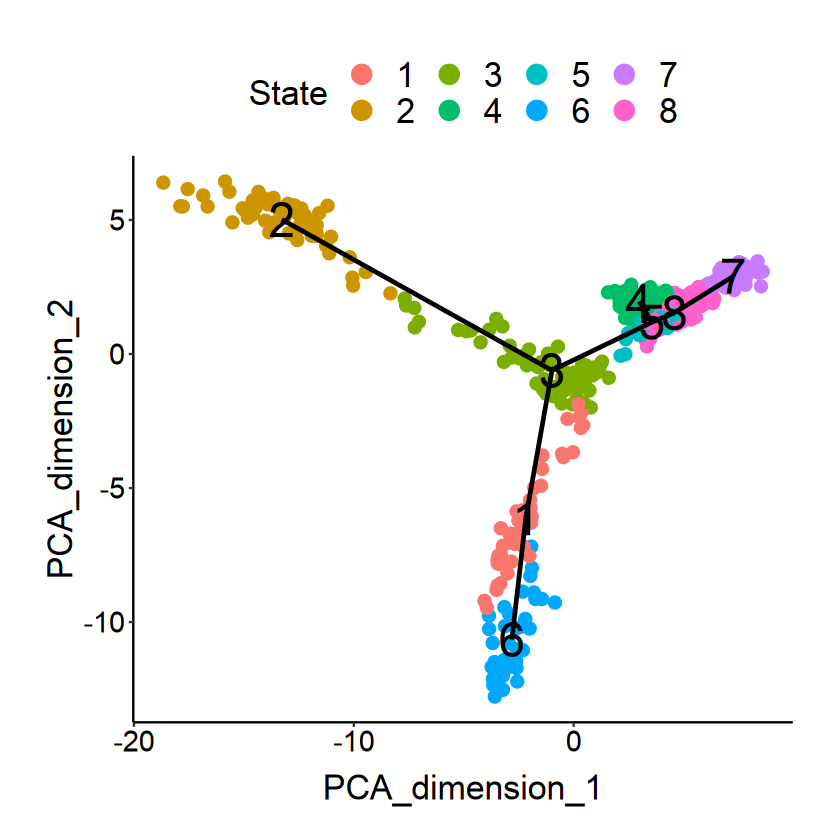

In [40]:
plotmclust(lpsmclust)

In [41]:
tscan_order = TSCANorder(lpsmclust)

In [42]:
tail(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell228,cell228,7,352
cell380,cell380,7,353
cell382,cell382,7,354
cell51,cell51,7,355
cell196,cell196,7,356
cell160,cell160,7,357


In [43]:
tscan_order[rownames(ss0@meta.data),"Pseudotime"]

[1]  61  NA 107  NA  NA  45 231   7 115 267 326  NA  NA 276 224  NA  57  NA
 [19]  83  71  78 334  NA  NA  NA  54  39 183  92  29  34 347  NA  90 152 332
 [37] 225 168 327  86 193 192  NA  NA 331  50 181  75  NA  NA 355 278 167 227
 [55]   6 260 100  NA 296 283 249 207 186 118  NA  NA 230  NA 247  35  52 120
 [73] 239  NA  NA 158 268  NA 175 223 139  NA  19  26  88  NA 188  20 220 246
 [91] 113 212 169 237 126 242 221  79 119 271  18  NA  NA 174  33 146 171  NA
[109]  NA  NA 187  NA  NA   4 184 151   8 305 138  64  NA 233  NA 344 128  77
[127] 299  NA  60 275  NA 110  NA  NA 329 234  NA  NA 311 164 291 255  NA  99
[145] 153 325 141  NA  NA 179 323   5 131  16  NA  46 136  NA  96 357 288 180
[163] 285  NA 330   9 294  95 261  NA 135  53  84  17 342  NA 148  NA  68 209
[181] 205  NA 211  72  56  13  48  NA  NA 308 266 303 343 208 172 356  NA  NA
[199] 281 173  NA  NA  NA  22 262  NA  NA  NA  NA 147 214 117 245 348  62  NA
[217] 190 144  91  NA 112  15  98  NA 269 219  NA 352 333 244 222 236 328  NA
[235]  93 350 160 213 300  NA  66 241 156 101 195  NA 315 142  82 320  81 287
[253]  NA  NA 109  NA 307 206 105 116 292  NA 111  NA 316 210 339 314  NA 250
[271] 259  NA  65  74  NA 264 337 340 254 253  NA  NA  NA 229  NA  NA  NA  NA
[289] 122 317 200 279 155  NA 258  NA 284 235  NA  NA  70 338 124  NA  NA 312
[307]  40  25 324 185 102  NA  36 150  NA 257  NA 273  NA 217 263 114   2 159
[325]  27  89  NA 196 306 177 319 336  NA 170 351  12 163 204  NA  NA  NA 295
[343]  NA  NA 280   1  NA 322 121 154 345  32 256 197 149 318 226 202 215  NA
[361] 157 228  NA  NA 203  94 270  NA  43 240  NA 335  63  NA  NA  NA  NA  NA
[379] 189 353  NA 354  NA 103   3 251 297 293  38  NA  NA  NA 125  42  47  24
[397]  76  67  NA  14  58  NA  51 218 166  NA 129  80  73 248 301 165  NA  85
[415] 132  NA 289 140 309  NA 143 198  41 176  NA  NA 216 310  28 127 182  97
[433]  NA 238 243  NA 137 321  NA 130  11 298  23 178  NA  NA 290 106 134  NA
[451] 133 104  21 286  31  NA  37 201 191 341  59 346 272  44  30  NA 349 282
[469] 194 302 277  NA  NA 162  NA  NA 304  69 145  NA 232 161 199  87 313  NA
[487] 252  NA 274  55  NA 123  NA  49  10 108  NA  NA 265  NA

In [44]:
tscan_rank = rank(tscan_order[rownames(ss0@meta.data),"Pseudotime"], ties.method = 'random', na.last = 'keep')
tscan_norm = scales::rescale(tscan_rank,to = c(0,1))
ss0@meta.data$tscan_norm = tscan_norm
ss0@meta.data$tscan = tscan_order[rownames(ss0@meta.data),"Pseudotime"]

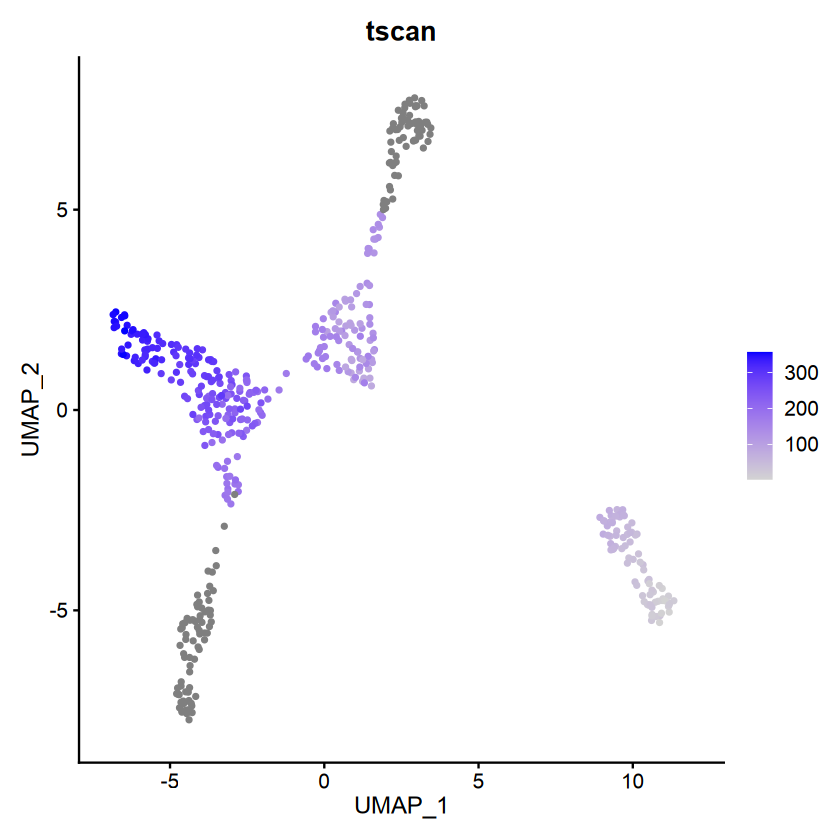

In [45]:
FeaturePlot(ss0, features = c("tscan"), reduction = "umap")

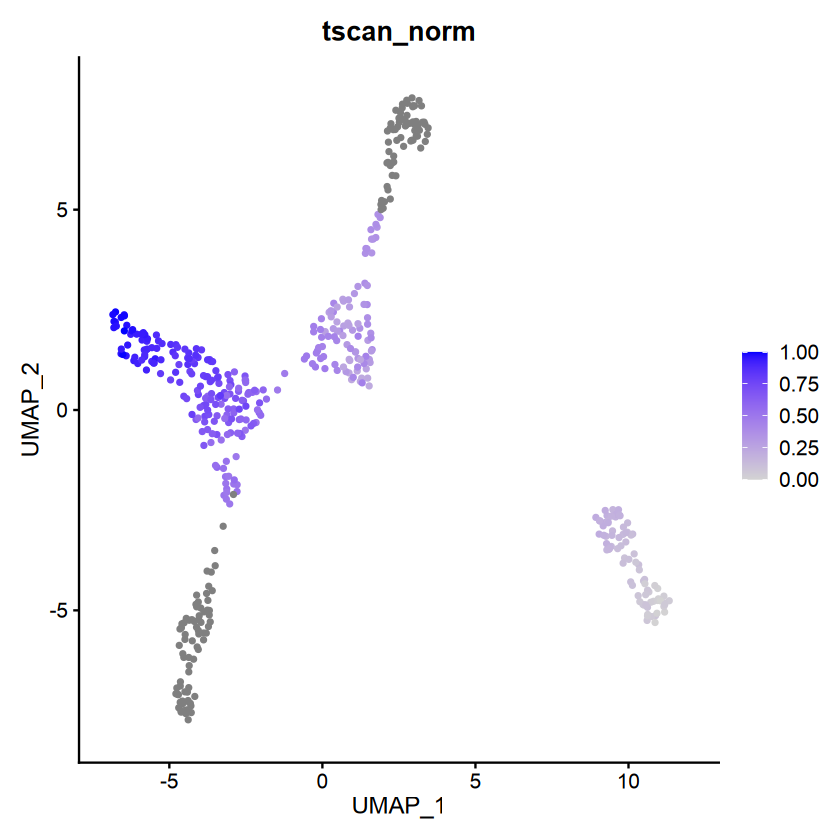

In [46]:
FeaturePlot(ss0, features = c("tscan_norm"), reduction = "umap")

# Comparison

In [47]:
long_df <- gather(ss0@meta.data[,c("dpt_norm", "monocle3_norm", "tscan_norm", "sim_time_norm", "Cell_Type", "lineage")],
                  key = "variable", value = "value", -sim_time_norm, -Cell_Type, -lineage)
colnames(long_df) = c('sim_time_norm', 'Cell_Type', 'lineage', 'method', 'value')
long_df$method[long_df$method=='dpt_norm'] = "DPT"
long_df$method[long_df$method=='monocle3_norm'] = "monocle3"
long_df$method[long_df$method=='tscan_norm'] = "TSCAN"
head(long_df)

,sim_time_norm,Cell_Type,lineage,method,value
,<dbl>,<chr>,<int>,<chr>,<dbl>
1,0.9939880,I,3,DPT,0.7314629
2,0.9398798,A,1,DPT,0.9118236
3,0.6873747,I,3,DPT,0.6372745
4,0.7835671,G,2,DPT,0.4829659
5,0.7474950,A,1,DPT,0.9058116
6,0.7675351,I,3,DPT,0.7695391


In [48]:
correlation_with_gt <- data.frame(
  method = c("ONTraC", "DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(ss0@meta.data$r, ss0@meta.data$Cell_NTScore, method = "spearman", use = "complete.obs")),
                  abs(cor(ss0@meta.data$r, ss0@meta.data$dpt, method = "spearman", use = "complete.obs")),
                  abs(cor(ss0@meta.data$r, ss0@meta.data$monocle3, method = "spearman", use = "complete.obs")),
                  abs(cor(ss0@meta.data$r, ss0@meta.data$tscan, method = "spearman", use = "complete.obs"))
                 )
)
head(correlation_with_gt)

,method,correlation
,<chr>,<dbl>
1,ONTraC,0.992836739
2,DPT,0.019781551
3,monocle3,0.012423660
4,TSCAN,0.007471559


In [49]:
all_correlation_with_gt = data.frame()
correlations_ = correlation_with_gt
correlations_$lineage = "all"
all_correlation_with_gt = rbind(all_correlation_with_gt, correlations_)
all_correlation_with_gt

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.992836739,all
DPT,0.019781551,all
monocle3,0.012423660,all
TSCAN,0.007471559,all


# Output

## correlation with r (truth NT)

In [50]:
all_correlation_with_gt$correlation = round(all_correlation_with_gt$correlation, 2)
all_correlation_with_gt
write.csv(all_correlation_with_gt,'Spearman_correlation_with_truth.csv')

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.99,all
DPT,0.02,all
monocle3,0.01,all
TSCAN,0.01,all


## pseudotime

In [51]:
head(ss0@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,RNA_snn_res.2,seurat_clusters,sim_time_rank,sim_time_norm,dpt_norm,dpt,monocle3_norm,monocle3,tscan_norm,tscan
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,698,60,1096.0238,I,0.1899555,0.7234187,3,0.3400232,0.19909275,4,4,497,0.9939880,0.7314629,19.494454,0.6793587,Inf,0.1685393,61
cell2,SeuratProject,1021,78,852.2690,A,0.8986162,0.8862130,1,0.2352948,0.04155392,2,2,470,0.9398798,0.9118236,26.019171,0.8436874,Inf,NA,NA
cell3,SeuratProject,364,56,437.9376,I,0.1772525,0.5725945,3,0.4814236,0.44504909,1,1,344,0.6873747,0.6372745,15.455340,0.6192385,Inf,0.2977528,107
cell4,SeuratProject,520,51,491.5607,G,0.9773162,0.2535936,2,0.7934621,0.89561595,8,8,392,0.7835671,0.4829659,9.176393,0.5711423,Inf,NA,NA
cell5,SeuratProject,917,74,475.7619,A,0.9611189,0.9822358,1,0.1899959,0.01498122,2,2,374,0.7474950,0.9058116,25.956647,0.6633267,Inf,NA,NA
cell6,SeuratProject,783,62,484.9720,I,0.2361229,0.8074413,3,0.2451217,0.10953713,4,4,384,0.7675351,0.7695391,19.742992,0.3687375,Inf,0.1235955,45


In [52]:
colnames(ss0@meta.data)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "sim_time"       
 [5] "Cell_Type"       "x"               "y"               "lineage"        
 [9] "r"               "Cell_NTScore"    "RNA_snn_res.2"   "seurat_clusters"
[13] "sim_time_rank"   "sim_time_norm"   "dpt_norm"        "dpt"            
[17] "monocle3_norm"   "monocle3"        "tscan_norm"      "tscan"

In [53]:
pseudotime_output = ss0@meta.data[,c('x', 'y', 'r', 'Cell_NTScore', 'dpt', 'monocle3','tscan','dpt_norm', 'monocle3_norm','tscan_norm')]
head(pseudotime_output)

,x,y,r,Cell_NTScore,dpt,monocle3,tscan,dpt_norm,monocle3_norm,tscan_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,0.1899555,0.7234187,0.3400232,0.19909275,19.494454,Inf,61,0.7314629,0.6793587,0.1685393
cell2,0.8986162,0.8862130,0.2352948,0.04155392,26.019171,Inf,NA,0.9118236,0.8436874,NA
cell3,0.1772525,0.5725945,0.4814236,0.44504909,15.455340,Inf,107,0.6372745,0.6192385,0.2977528
cell4,0.9773162,0.2535936,0.7934621,0.89561595,9.176393,Inf,NA,0.4829659,0.5711423,NA
cell5,0.9611189,0.9822358,0.1899959,0.01498122,25.956647,Inf,NA,0.9058116,0.6633267,NA
cell6,0.2361229,0.8074413,0.2451217,0.10953713,19.742992,Inf,45,0.7695391,0.3687375,0.1235955


In [54]:
head(pseudotime_output)

,x,y,r,Cell_NTScore,dpt,monocle3,tscan,dpt_norm,monocle3_norm,tscan_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,0.1899555,0.7234187,0.3400232,0.19909275,19.494454,Inf,61,0.7314629,0.6793587,0.1685393
cell2,0.8986162,0.8862130,0.2352948,0.04155392,26.019171,Inf,NA,0.9118236,0.8436874,NA
cell3,0.1772525,0.5725945,0.4814236,0.44504909,15.455340,Inf,107,0.6372745,0.6192385,0.2977528
cell4,0.9773162,0.2535936,0.7934621,0.89561595,9.176393,Inf,NA,0.4829659,0.5711423,NA
cell5,0.9611189,0.9822358,0.1899959,0.01498122,25.956647,Inf,NA,0.9058116,0.6633267,NA
cell6,0.2361229,0.8074413,0.2451217,0.10953713,19.742992,Inf,45,0.7695391,0.3687375,0.1235955


In [55]:
colnames(pseudotime_output) = c('x', 'y', 'r', 'ONTraC',
                                'DPT', 'monocle3', 'TSCAN', 
                                'DPT_norm', 'monocle3_norm', 'TSCAN_norm')
head(pseudotime_output)

,x,y,r,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,TSCAN_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,0.1899555,0.7234187,0.3400232,0.19909275,19.494454,Inf,61,0.7314629,0.6793587,0.1685393
cell2,0.8986162,0.8862130,0.2352948,0.04155392,26.019171,Inf,NA,0.9118236,0.8436874,NA
cell3,0.1772525,0.5725945,0.4814236,0.44504909,15.455340,Inf,107,0.6372745,0.6192385,0.2977528
cell4,0.9773162,0.2535936,0.7934621,0.89561595,9.176393,Inf,NA,0.4829659,0.5711423,NA
cell5,0.9611189,0.9822358,0.1899959,0.01498122,25.956647,Inf,NA,0.9058116,0.6633267,NA
cell6,0.2361229,0.8074413,0.2451217,0.10953713,19.742992,Inf,45,0.7695391,0.3687375,0.1235955


In [56]:
write.csv(pseudotime_output, "pseudotime_output.csv")

## UMAP embeddings

In [57]:
str(ss0@reductions$umap, 2)

Formal class 'DimReduc' [package "SeuratObject"] with 9 slots
  ..@ cell.embeddings           : num [1:500, 1:2] 9.49 2.85 1.56 -4.28 2.15 ...
  .. ..- attr(*, "scaled:center")= num [1:2] 1.97 0.31
  .. ..- attr(*, "dimnames")=List of 2
  ..@ feature.loadings          : num[0 , 0 ] 
  ..@ feature.loadings.projected: num[0 , 0 ] 
  ..@ assay.used                : chr "RNA"
  ..@ global                    : logi TRUE
  ..@ stdev                     : num(0) 
  ..@ key                       : chr "UMAP_"
  ..@ jackstraw                 :Formal class 'JackStrawData' [package "SeuratObject"] with 4 slots
  ..@ misc                      : list()


In [58]:
write.csv(ss0@reductions$umap@cell.embeddings,'UMAP_embeddings.csv')

# Lineages

In [59]:
unique(ss0@meta.data$lineage)

[1] 3 1 2

# Lineage 1

## subset sce and seurat

In [60]:
sim_data_l1 <- sim_data[,sim_data@colData$lineage == 1]

In [61]:
dim(sim_data_l1)

[1] 100 309

In [62]:
head(ss0@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,RNA_snn_res.2,seurat_clusters,sim_time_rank,sim_time_norm,dpt_norm,dpt,monocle3_norm,monocle3,tscan_norm,tscan
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,698,60,1096.0238,I,0.1899555,0.7234187,3,0.3400232,0.19909275,4,4,497,0.9939880,0.7314629,19.494454,0.6793587,Inf,0.1685393,61
cell2,SeuratProject,1021,78,852.2690,A,0.8986162,0.8862130,1,0.2352948,0.04155392,2,2,470,0.9398798,0.9118236,26.019171,0.8436874,Inf,NA,NA
cell3,SeuratProject,364,56,437.9376,I,0.1772525,0.5725945,3,0.4814236,0.44504909,1,1,344,0.6873747,0.6372745,15.455340,0.6192385,Inf,0.2977528,107
cell4,SeuratProject,520,51,491.5607,G,0.9773162,0.2535936,2,0.7934621,0.89561595,8,8,392,0.7835671,0.4829659,9.176393,0.5711423,Inf,NA,NA
cell5,SeuratProject,917,74,475.7619,A,0.9611189,0.9822358,1,0.1899959,0.01498122,2,2,374,0.7474950,0.9058116,25.956647,0.6633267,Inf,NA,NA
cell6,SeuratProject,783,62,484.9720,I,0.2361229,0.8074413,3,0.2451217,0.10953713,4,4,384,0.7675351,0.7695391,19.742992,0.3687375,Inf,0.1235955,45


In [63]:
seurat_l1 = subset(ss0, cells=rownames(ss0@meta.data[ss0@meta.data$lineage == 1,]))

In [64]:
dim(seurat_l1)

[1] 100 309

## DPT

In [65]:
dm.use.1 <- DiffusionMap(data = sim_data_l1)

Warning message in (function (data, k, ..., query = NULL, distance = c("euclidean", :
“find_knn does not yet support sparse matrices, converting data to a dense matrix.”


In [66]:
rownames(seurat_l1@meta.data[seurat_l1@meta.data$sim_time==min(seurat_l1@meta.data$sim_time),])
#cell214

[1] "cell214"

In [67]:
rownames(seurat_l1@meta.data[seurat_l1@meta.data$sim_time==max(seurat_l1@meta.data$sim_time),])
#cell112

[1] "cell112"

In [68]:
seurat_l1[['dmap']] <- CreateDimReducObject(embeddings = dm.use.1@eigenvectors,
                                            assay = 'RNA',
                                            stdev = dm.use.1@eigenvalues,
                                            key = 'DC_')


In [69]:
root.use = c('cell214','cell112')

dpt.use.1 = DPT(dm.use.1,tips = match(root.use,rownames(dm.use.1@eigenvectors)))
dpt_l1_rank = rank(dpt.use.1$dpt,ties.method = 'random', na.last = 'keep')
seurat_l1@meta.data$dpt_l1_norm <- scales::rescale(dpt_l1_rank,to = c(0,1))
seurat_l1@meta.data$dpt_l1 = dpt.use.1$dpt

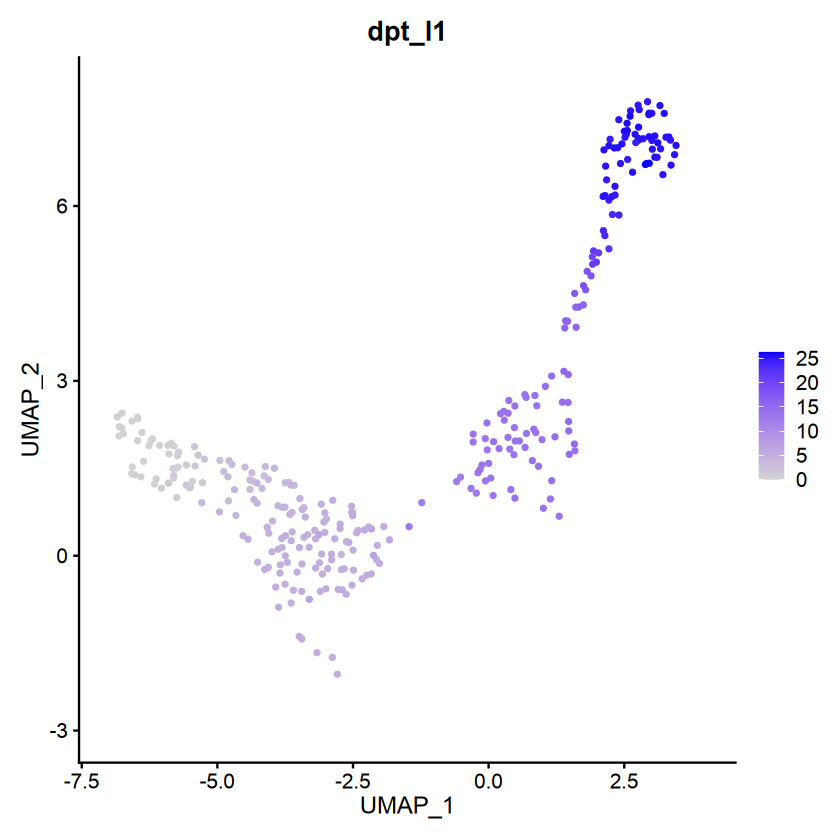

In [70]:
FeaturePlot(seurat_l1, features = c("dpt_l1"), reduction = "umap")

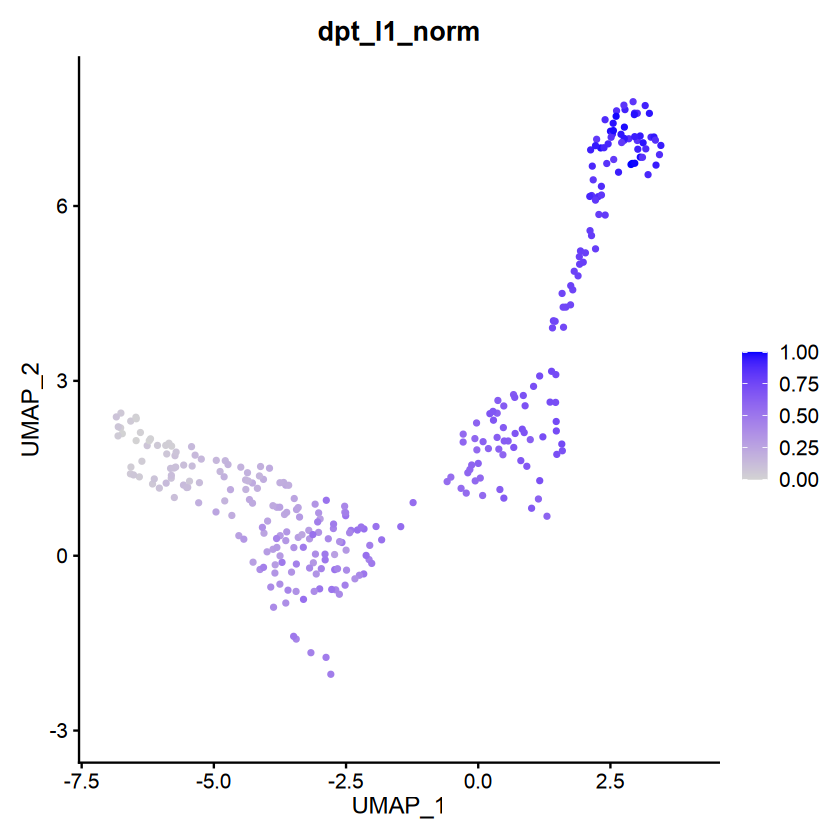

In [71]:
FeaturePlot(seurat_l1, features = c("dpt_l1_norm"), reduction = "umap")

## monocle

In [72]:
gene_annotation <- as.data.frame(sim_data_l1@assays@data@listData$counts@Dimnames[[1]], row.names = sim_data_l1@assays@data@listData$counts@Dimnames[[1]])
colnames(gene_annotation) <- "gene_short_name"

cds <- new_cell_data_set(sim_data_l1@assays@data@listData$counts,
                         cell_metadata = sim_data_l1@colData,
                         gene_metadata = gene_annotation)

In [73]:
cds <- preprocess_cds(cds, method = "PCA", num_dim = 20)

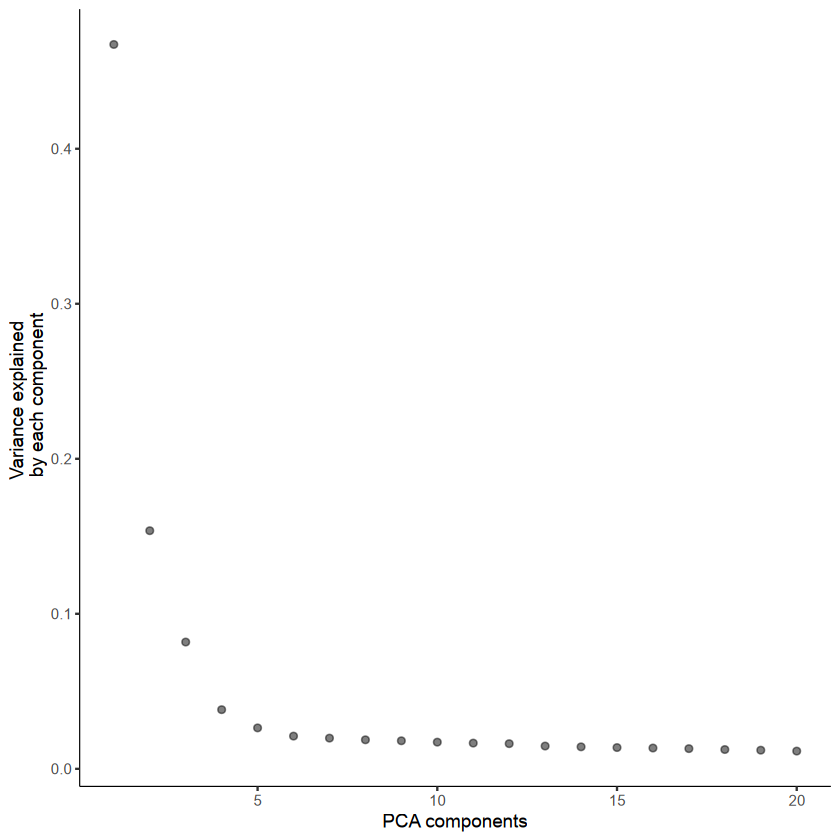

In [74]:
plot_pc_variance_explained(cds)

In [75]:
# cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA", umap.min_dist=0.5, umap.n_neighbors= 15L)
cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA")

In [76]:
cds <- cluster_cells(cds, reduction_method = "UMAP")

In [77]:
cds <- learn_graph(cds, use_partition=TRUE)

In [78]:
cds <- order_cells(cds, root_cells=root.use)

In [79]:
pseudotime <- pseudotime(cds) 

In [80]:
length(pseudotime)

[1] 309

In [81]:
monocle3_l1_rank <- rank(pseudotime,ties.method = 'random', na.last = 'keep')
monocle3_l1_norm <- scales::rescale(monocle3_l1_rank,to = c(0,1))

In [82]:
seurat_l1@meta.data$monocle3_l1_norm <- monocle3_l1_norm
seurat_l1@meta.data$monocle3_l1 <- pseudotime

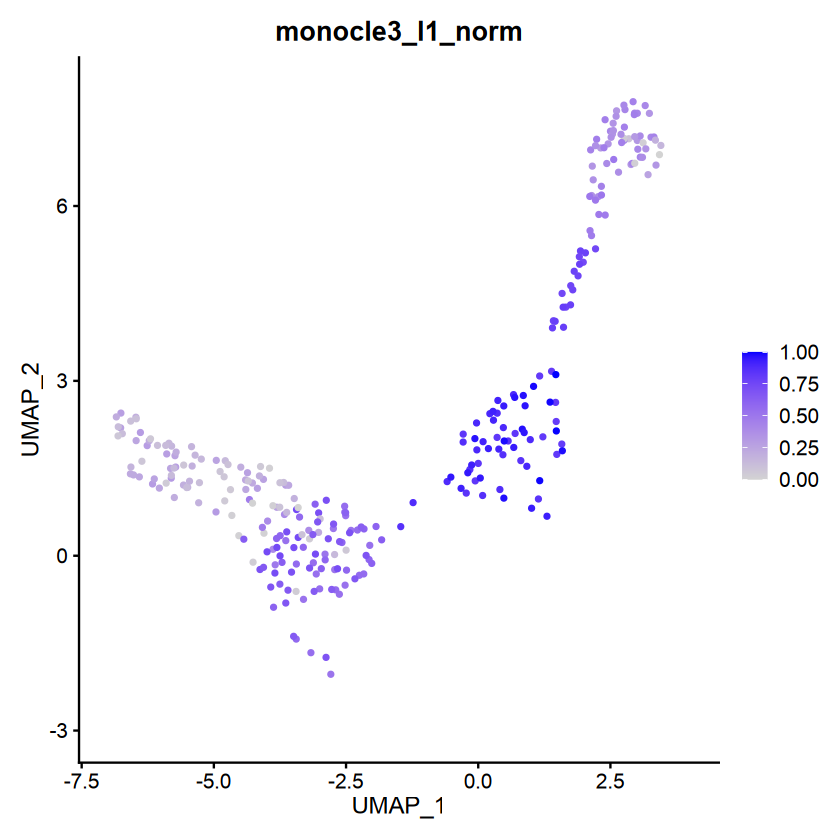

In [83]:
FeaturePlot(seurat_l1, features = c("monocle3_l1_norm"), reduction = "umap")

## TSCAN

In [84]:
library(TSCAN)

In [85]:
exp <- as.matrix(seurat_l1@assays$RNA@data)
procdata <- preprocess(exp, minexpr_value = 0, minexpr_percent = 0.001, cvcutoff = 0.01)


In [86]:
lpsmclust <- exprmclust(procdata)
tscan_order = TSCANorder(lpsmclust)

In [87]:
str(lpsmclust, 2)

List of 4
 $ pcareduceres: num [1:309, 1:2] -11.571 -10.65 3.362 -0.325 4.697 ...
  ..- attr(*, "dimnames")=List of 2
 $ MSTtree     :Class 'igraph'  hidden list of 10
  ..$ : num 8
  ..$ : logi FALSE
  ..$ : num [1:7] 5 2 4 6 7 7 6
  ..$ : num [1:7] 0 1 1 2 3 4 5
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ :List of 4
  ..$ :<environment: 0x55aac222a858> 
 $ clusterid   : Named int [1:309] 6 6 2 3 5 8 1 5 2 6 ...
  ..- attr(*, "names")= chr [1:309] "cell2" "cell5" "cell7" "cell9" ...
 $ clucenter   : num [1:8, 1:2] -12.797 3.712 0.145 7.284 5.192 ...


In [88]:
head(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell296,cell296,1,1
cell391,cell391,1,2
cell377,cell377,1,3
cell176,cell176,1,4
cell282,cell282,1,5
cell158,cell158,1,6


In [89]:
tail(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell228,cell228,4,304
cell380,cell380,4,305
cell196,cell196,4,306
cell51,cell51,4,307
cell382,cell382,4,308
cell160,cell160,4,309


In [90]:
tscan_order[rownames(seurat_l1@meta.data),"Pseudotime"]

[1]  43  51 168 109 220 281  26 231 157  44 289  56 299  21 120 292 159 132
 [19] 276 158 141 282 307 226 127 166 209 110  45 249 229 197 154 145  82  23
 [37]  15 178 193  84 190  91 223  62 140 151  74  92 149 210 182 124 147 129
 [55] 202  88 183 204 227  59 136 122  93  25  18 148   7  54 113 258  72 176
 [73]   9 297  76 250  40 225  34  61 279 177  58 260 126 243 199 123 277  89
 [91]  27  13 280  70  80   6 102 309 242 235 284 246 212  69 291   4 116  42
[109] 187 164 194  65  32 257 218 255 286 162 135 306  64 232 137  36   8 213
[127]  30  19 201 103 195 303  37  99 221 185 304 278 156 163 196 283  96 298
[145] 128 150 252  50 181 119  97 142 269 118 272 238  87  47 261 152 101 253
[163] 107  12 267 160 296 266  60 198 214  49 216 285 295 207 188   5  52 165
[181]  33  77 271 146 230 112 211   1 237 184 287  81  10 264 275 115 105  67
[199] 203 219 155 215 106 130  22 144 256 268 293  48 139 302 134 174  66 245
[217]  63 234 274 117 121 301 208 167 111 270 175 179 173 180  53 153 104 222
[235] 189 294  41  46  31   3 305 308 114 206 248 244   2  38  83  16 186 131
[253]  57  90 205 247 125  86 241  73 263 108 171 138 172 262  71 100 191 192
[271]  39  85 273  78 254 240  98  68  79  95 239  35 169 288 290 224  17 300
[289] 236 143 251 233  29 133  11  55 259  24 170 161 265 200 228  75  14  94
[307]  28  20 217

In [91]:
tscan_l1_rank = rank(tscan_order[rownames(seurat_l1@meta.data),"Pseudotime"], ties.method = 'random', na.last = 'keep')
tscan_l1_norm = scales::rescale(tscan_l1_rank,to = c(0,1))
seurat_l1@meta.data$tscan_l1_norm = tscan_l1_norm
seurat_l1@meta.data$tscan_l1 = tscan_order[rownames(seurat_l1@meta.data),"Pseudotime"]

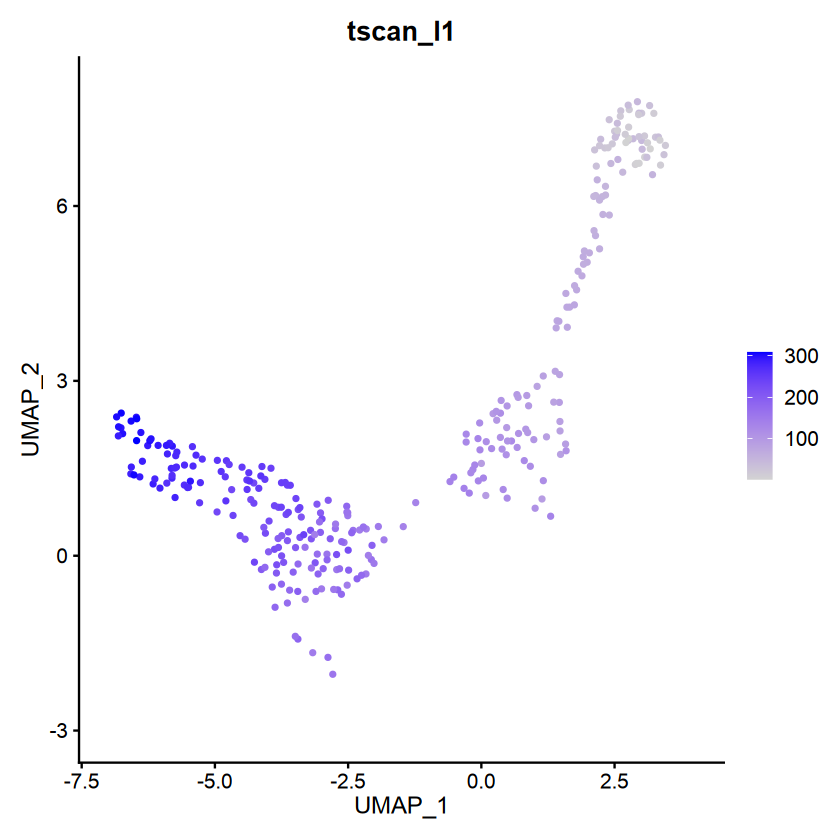

In [92]:
FeaturePlot(seurat_l1, features = c("tscan_l1"), reduction = "umap")

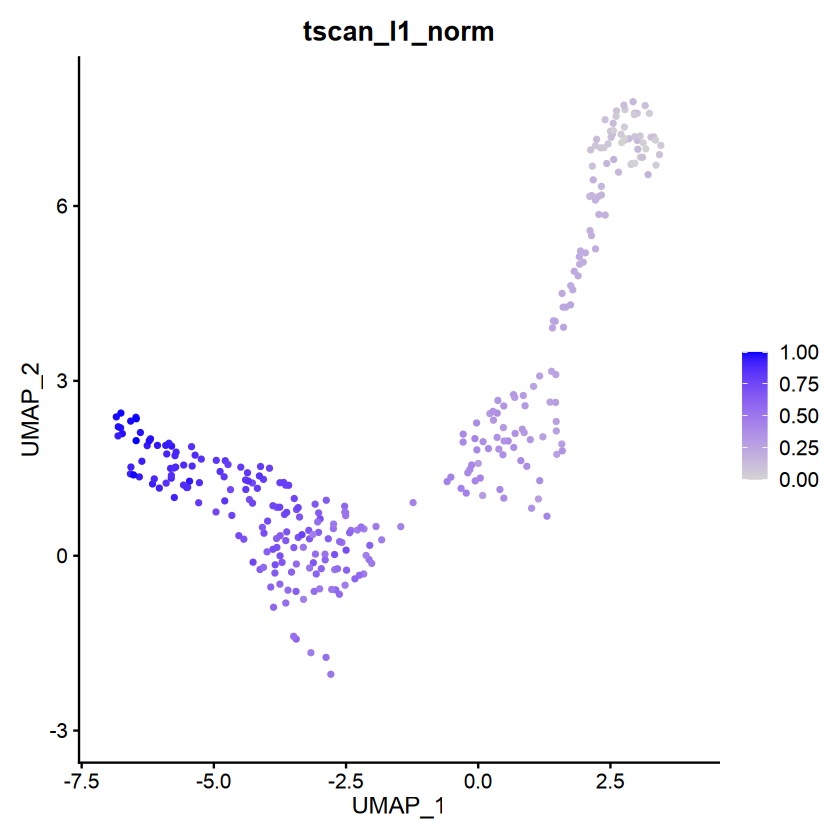

In [93]:
FeaturePlot(seurat_l1, features = c("tscan_l1_norm"), reduction = "umap")

## comparison

In [94]:
head(seurat_l1@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,⋯,monocle3_norm,monocle3,tscan_norm,tscan,dpt_l1_norm,dpt_l1,monocle3_l1_norm,monocle3_l1,tscan_l1_norm,tscan_l1
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell2,SeuratProject,1021,78,852.26897,A,0.89861622,0.8862130,1,0.23529476,0.0415539169,⋯,0.84368737,Inf,NA,NA,0.86038961,25.2015862,0.08441558,0.2153083,0.1363636,43
cell5,SeuratProject,917,74,475.76186,A,0.96111891,0.9822358,1,0.18999592,0.0149812209,⋯,0.66332665,Inf,NA,NA,0.84415584,25.0954448,0.35064935,0.8187723,0.1623377,51
cell7,SeuratProject,318,41,183.11251,A,0.09894517,0.9422671,1,0.18829206,0.0616074376,⋯,0.26853707,6.4998499,0.6460674,231,0.43506494,5.2565138,0.50649351,1.9460485,0.5422078,168
cell9,SeuratProject,477,54,342.05375,A,0.10747460,0.9865250,1,0.14518208,0.0434847377,⋯,0.79559118,Inf,0.3202247,115,0.63636364,13.7712143,0.82792208,5.2249516,0.3506494,109
cell10,SeuratProject,257,38,130.51467,A,0.85649273,0.9077020,1,0.19464788,0.0206733804,⋯,0.22044088,5.1295043,0.7471910,267,0.29220779,4.9493902,0.49025974,1.7554534,0.7110390,220
cell11,SeuratProject,191,27,50.45716,A,0.59744699,0.9673994,1,0.04170057,0.0005034464,⋯,0.04208417,0.7198621,0.9129213,326,0.09090909,0.5921364,0.30844156,0.2656887,0.9090909,281


In [95]:
seurat_l1@meta.data$dpt_l1_rank = rank(seurat_l1@meta.data$dpt, ties.method = 'random', na.last = 'keep')
seurat_l1@meta.data$dpt_l1_norm <- scales::rescale(seurat_l1@meta.data$dpt_l1_rank,to = c(0,1))


In [96]:
seurat_l1@meta.data$sim_time_l1_rank = rank(seurat_l1@meta.data$sim_time, ties.method = 'random', na.last = 'keep')
seurat_l1@meta.data$sim_time_l1_norm <- scales::rescale(seurat_l1@meta.data$sim_time_l1_rank,to = c(0,1))

In [97]:
long_df <- gather(seurat_l1@meta.data[,c("dpt_l1_norm", "monocle3_l1_norm", "sim_time_l1_norm", "Cell_Type", "lineage")], key = "variable", value = "value", -sim_time_l1_norm, -Cell_Type, -lineage)
colnames(long_df) = c('sim_time_l1_norm', 'Cell_Type', 'lineage', 'method', 'value')
long_df$method[long_df$method=='dpt_l1_norm'] = "DPT"
long_df$method[long_df$method=='monocle3_l1_norm'] = "monocle3"
long_df$method[long_df$method=='tscan_l1_norm'] = "TSCAN"
head(long_df)

,sim_time_l1_norm,Cell_Type,lineage,method,value
,<dbl>,<chr>,<int>,<chr>,<dbl>
1,0.9642857,A,1,DPT,0.85714286
2,0.8474026,A,1,DPT,0.84740260
3,0.4480519,A,1,DPT,0.43506494
4,0.6850649,A,1,DPT,0.62337662
5,0.3019481,A,1,DPT,0.29220779
6,0.1006494,A,1,DPT,0.09090909


In [98]:
cor.test(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$dpt_l1_norm, na.rm=T)$estimate
cor.test(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$monocle3_l1_norm, na.rm=T)$estimate
cor.test(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$tscan_l1_norm, na.rm=T)$estimate


cor 
0.9878045

cor 
0.426408

cor 
-0.9865627

In [99]:
correlations <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$dpt_l1_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$monocle3_l1_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$tscan_l1_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlations)

,method,correlation
,<chr>,<dbl>
1,DPT,0.9878045
2,monocle3,0.4264080
3,TSCAN,0.9865627


In [100]:
correlation_with_gt <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l1@meta.data$r, seurat_l1@meta.data$dpt_l1_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l1@meta.data$r, seurat_l1@meta.data$monocle3_l1_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l1@meta.data$r, seurat_l1@meta.data$tscan_l1_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlation_with_gt)

,method,correlation
,<chr>,<dbl>
1,DPT,0.017018559
2,monocle3,0.003354334
3,TSCAN,0.016757436


In [101]:
correlations_ = correlation_with_gt
correlations_$lineage = "lineage1"
all_correlation_with_gt = rbind(all_correlation_with_gt, correlations_)
all_correlation_with_gt

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.990000000,all
DPT,0.020000000,all
monocle3,0.010000000,all
TSCAN,0.010000000,all
DPT,0.017018559,lineage1
monocle3,0.003354334,lineage1
TSCAN,0.016757436,lineage1


In [102]:
long_df <- left_join(long_df, correlations, by = "method")
head(long_df)

,sim_time_l1_norm,Cell_Type,lineage,method,value,correlation
,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,0.9642857,A,1,DPT,0.85714286,0.9878045
2,0.8474026,A,1,DPT,0.84740260,0.9878045
3,0.4480519,A,1,DPT,0.43506494,0.9878045
4,0.6850649,A,1,DPT,0.62337662,0.9878045
5,0.3019481,A,1,DPT,0.29220779,0.9878045
6,0.1006494,A,1,DPT,0.09090909,0.9878045


Saving 6.67 x 6.67 in image


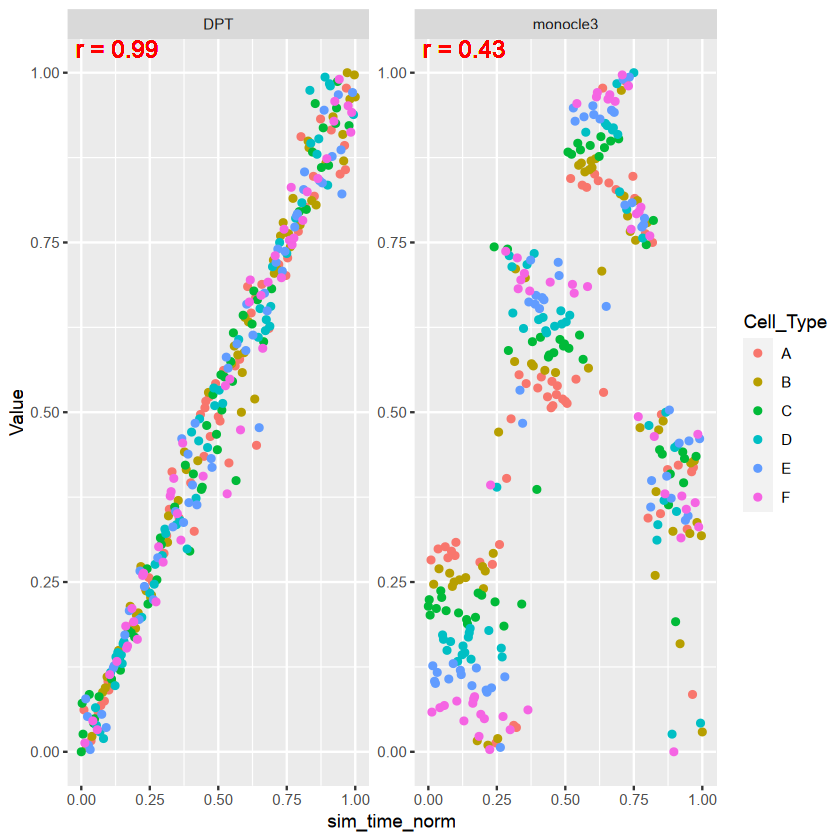

In [103]:
ggplot(long_df, aes(x = sim_time_l1_norm, y = value, color=Cell_Type, palette="Set1")) + 
  geom_point() + 
  facet_wrap(~method, scales = "free") +
  geom_text(aes(label = paste("r =", round(correlation, 2))), x = -Inf, y = Inf, hjust = -0.1, vjust = 1.1, color = "red", size = 5) +
  xlab("sim_time_norm") + 
  ylab("Value")
ggsave("Pseudotime_lineage1_comparison_cell_type.pdf")

# Lineage 2

## subset sce and seurat

In [104]:
sim_data_l2 <- sim_data[,sim_data@colData$lineage == 2]

In [105]:
dim(sim_data_l2)

[1] 100  88

In [106]:
head(ss0@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,RNA_snn_res.2,seurat_clusters,sim_time_rank,sim_time_norm,dpt_norm,dpt,monocle3_norm,monocle3,tscan_norm,tscan
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,698,60,1096.0238,I,0.1899555,0.7234187,3,0.3400232,0.19909275,4,4,497,0.9939880,0.7314629,19.494454,0.6793587,Inf,0.1685393,61
cell2,SeuratProject,1021,78,852.2690,A,0.8986162,0.8862130,1,0.2352948,0.04155392,2,2,470,0.9398798,0.9118236,26.019171,0.8436874,Inf,NA,NA
cell3,SeuratProject,364,56,437.9376,I,0.1772525,0.5725945,3,0.4814236,0.44504909,1,1,344,0.6873747,0.6372745,15.455340,0.6192385,Inf,0.2977528,107
cell4,SeuratProject,520,51,491.5607,G,0.9773162,0.2535936,2,0.7934621,0.89561595,8,8,392,0.7835671,0.4829659,9.176393,0.5711423,Inf,NA,NA
cell5,SeuratProject,917,74,475.7619,A,0.9611189,0.9822358,1,0.1899959,0.01498122,2,2,374,0.7474950,0.9058116,25.956647,0.6633267,Inf,NA,NA
cell6,SeuratProject,783,62,484.9720,I,0.2361229,0.8074413,3,0.2451217,0.10953713,4,4,384,0.7675351,0.7695391,19.742992,0.3687375,Inf,0.1235955,45


In [107]:
seurat_l2 = subset(ss0, cells=rownames(ss0@meta.data[ss0@meta.data$lineage == 2,]))

In [108]:
dim(seurat_l2)

[1] 100  88

## DPT

In [109]:
dm.use.2 <- DiffusionMap(data = sim_data_l2)

Warning message in (function (data, k, ..., query = NULL, distance = c("euclidean", :
“find_knn does not yet support sparse matrices, converting data to a dense matrix.”


In [110]:
#cell115
rownames(seurat_l2@meta.data[seurat_l2@meta.data$sim_time==min(seurat_l2@meta.data$sim_time),])


[1] "cell115"

In [111]:
rownames(seurat_l2@meta.data[seurat_l2@meta.data$sim_time==max(seurat_l2@meta.data$sim_time),])
#cell383

[1] "cell383"

In [112]:
seurat_l2[['dmap']] <- CreateDimReducObject(embeddings = dm.use.2@eigenvectors,
                                            assay = 'RNA',
                                            stdev = dm.use.2@eigenvalues,
                                            key = 'DC_')

In [113]:
root.use = c('cell115','cell383')

dpt.use.2 = DPT(dm.use.2,tips = match(root.use,rownames(dm.use.2@eigenvectors)))
dpt_l2_rank = rank(dpt.use.2$dpt,ties.method = 'random', na.last = 'keep')
seurat_l2@meta.data$dpt_l2_norm <- scales::rescale(dpt_l2_rank,to = c(0,1))
seurat_l2@meta.data$dpt_l2 = dpt.use.2$dpt

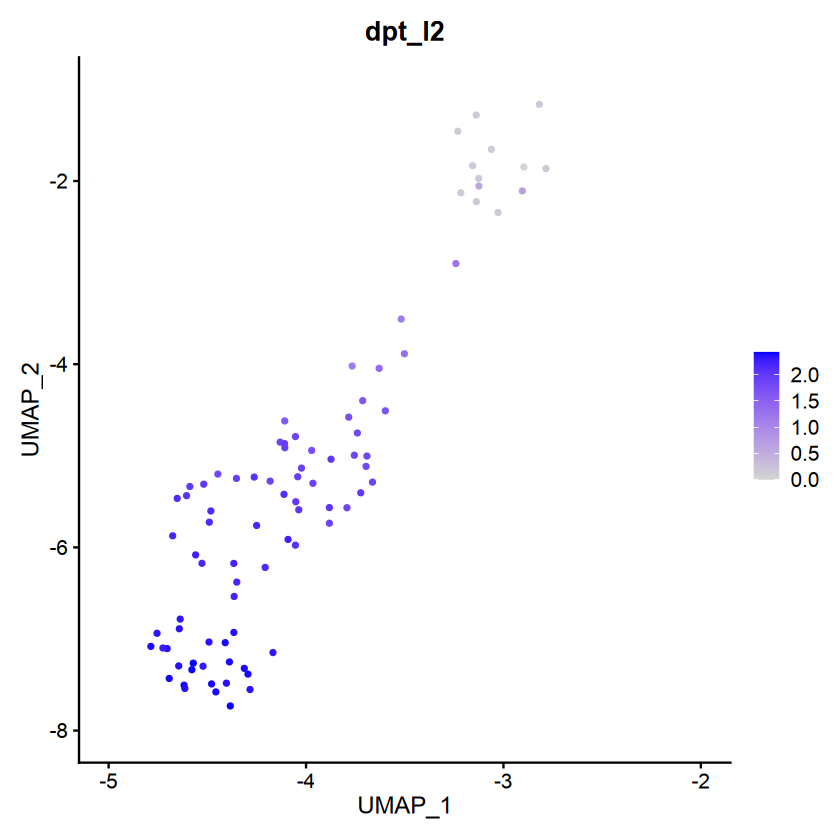

In [114]:
FeaturePlot(seurat_l2, features = c("dpt_l2"), reduction = "umap")

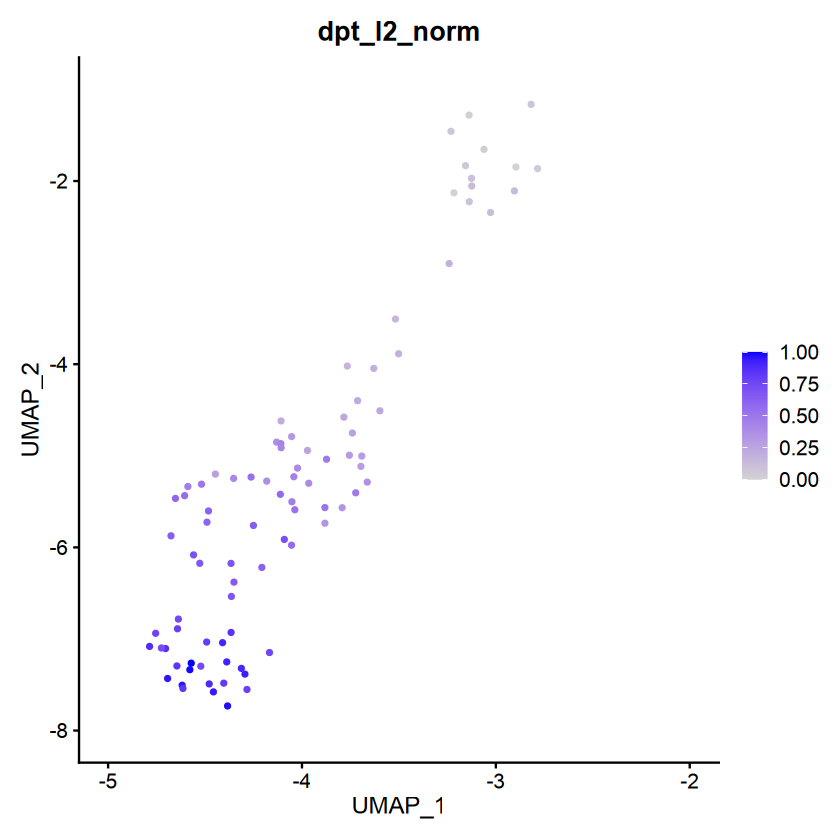

In [115]:
FeaturePlot(seurat_l2, features = c("dpt_l2_norm"), reduction = "umap")

## monocle

In [116]:
gene_annotation <- as.data.frame(sim_data_l2@assays@data@listData$counts@Dimnames[[1]],
                                 row.names = sim_data_l2@assays@data@listData$counts@Dimnames[[1]])
colnames(gene_annotation) <- "gene_short_name"

cds <- new_cell_data_set(sim_data_l2@assays@data@listData$counts,
                         cell_metadata = sim_data_l2@colData,
                         gene_metadata = gene_annotation)

In [117]:
cds <- preprocess_cds(cds, method = "PCA", num_dim = 20)

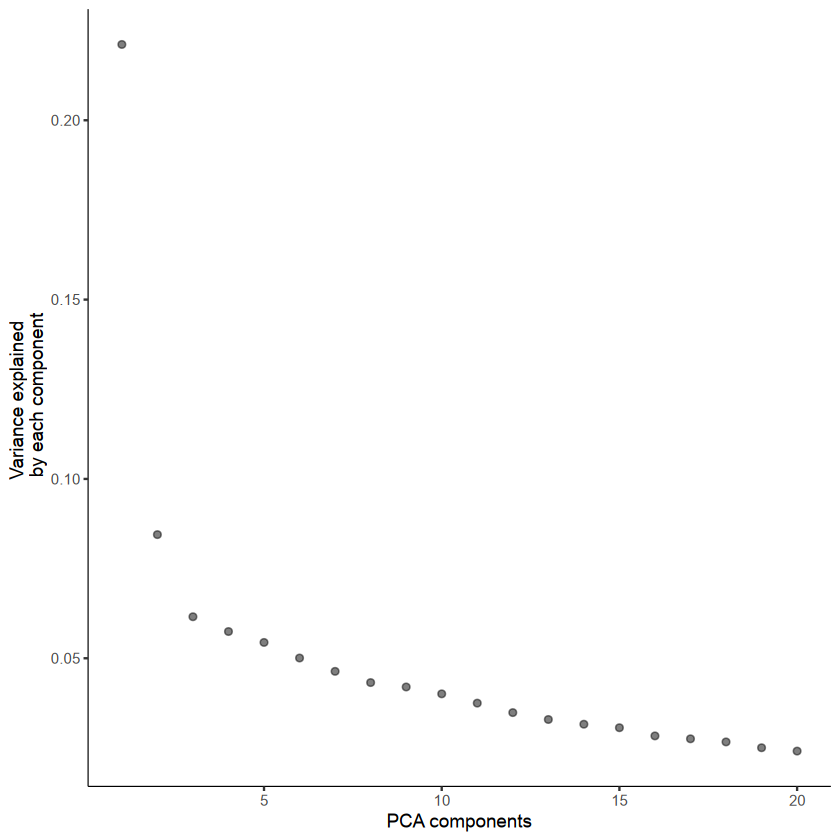

In [118]:
plot_pc_variance_explained(cds)

In [119]:
# cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA", umap.min_dist=0.5, umap.n_neighbors= 15L)
cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA")

In [120]:
cds <- cluster_cells(cds, reduction_method = "UMAP")

In [121]:
cds <- learn_graph(cds, use_partition=TRUE)

In [122]:
cds <- order_cells(cds, root_cells=root.use)

In [123]:
pseudotime <- pseudotime(cds) 

In [124]:
length(pseudotime)

[1] 88

In [125]:
monocle3_l2_rank <- rank(pseudotime,ties.method = 'random', na.last = 'keep')
monocle3_l2_norm <- scales::rescale(monocle3_l2_rank,to = c(0,1))

In [126]:
seurat_l2@meta.data$monocle3_l2_norm <- monocle3_l2_norm
seurat_l2@meta.data$monocle3_l2 <- pseudotime

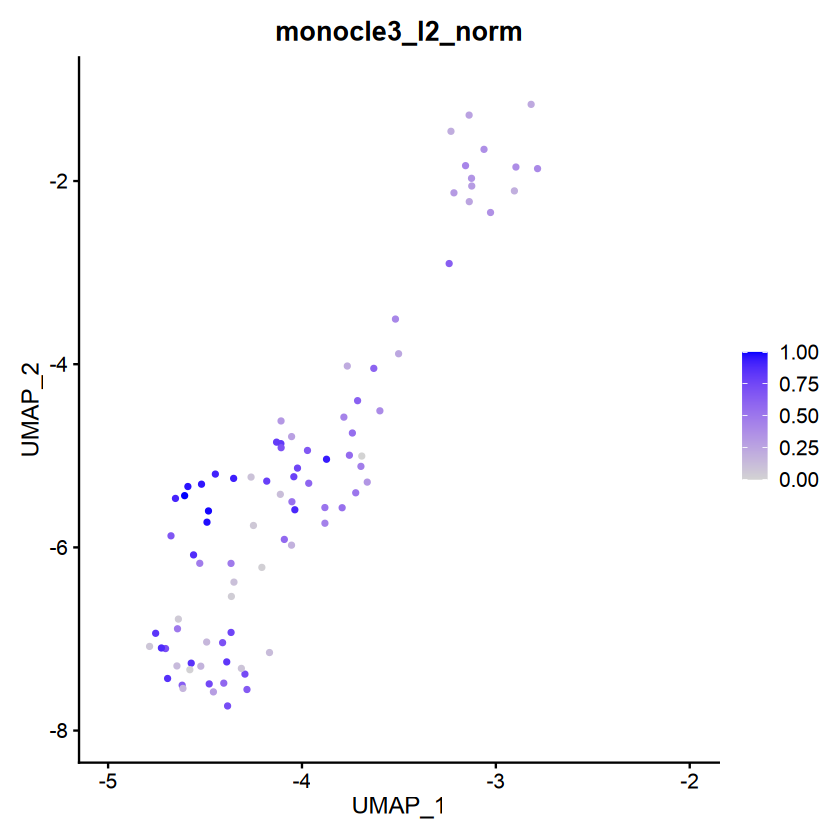

In [127]:
FeaturePlot(seurat_l2, features = c("monocle3_l2_norm"), reduction = "umap")

## TSCAN

In [128]:
library(TSCAN)

In [129]:
exp <- as.matrix(seurat_l2@assays$RNA@data)
procdata <- preprocess(exp, minexpr_value = 0, minexpr_percent = 0.001, cvcutoff = 0.01)


In [130]:
lpsmclust <- exprmclust(procdata)
tscan_order = TSCANorder(lpsmclust)

In [131]:
str(lpsmclust, 2)

List of 4
 $ pcareduceres: num [1:88, 1:2] 2.0207 1.1631 -0.0518 1.0323 1.9446 ...
  ..- attr(*, "dimnames")=List of 2
 $ MSTtree     :Class 'igraph'  hidden list of 10
  ..$ : num 2
  ..$ : logi FALSE
  ..$ : num 1
  ..$ : num 0
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ :List of 4
  ..$ :<environment: 0x55aaca0fee60> 
 $ clusterid   : Named int [1:88] 2 2 2 2 2 1 1 2 1 2 ...
  ..- attr(*, "names")= chr [1:88] "cell4" "cell13" "cell16" "cell24" ...
 $ clucenter   : num [1:2, 1:2] -4.518663 2.000064 0.000706 -0.000312


In [132]:
head(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell459,cell459,1,1
cell444,cell444,1,2
cell379,cell379,1,3
cell217,cell217,1,4
cell310,cell310,1,5
cell47,cell47,1,6


In [133]:
tail(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell416,cell416,2,83
cell216,cell216,2,84
cell68,cell68,2,85
cell347,cell347,2,86
cell44,cell44,2,87
cell227,cell227,2,88


In [134]:
tscan_order[rownames(seurat_l2@meta.data),"Pseudotime"]

[1] 57 50 37 48 56  8 13 87  6 81 68 85 65 22 27 77 78 23 10 60 31 53 44 11 63
[26]  9 80 72 46 79 26 47 73 84  4 74 88 32 69 54 43 18 66 71 55 38 39 52 62 41
[51] 67  5 34 16 75 12 70 24 51 86 33 29 42 20 82  3 36 76 25 40 61 83 59 45 64
[76]  7 28 19  2 21 58 15  1 17 30 49 14 35

In [135]:
tscan_l2_rank = rank(tscan_order[rownames(seurat_l2@meta.data),"Pseudotime"], ties.method = 'random', na.last = 'keep')
tscan_l2_norm = scales::rescale(tscan_l2_rank,to = c(0,1))
seurat_l2@meta.data$tscan_l2_norm = tscan_l2_norm
seurat_l2@meta.data$tscan_l2 = tscan_order[rownames(seurat_l2@meta.data),"Pseudotime"]

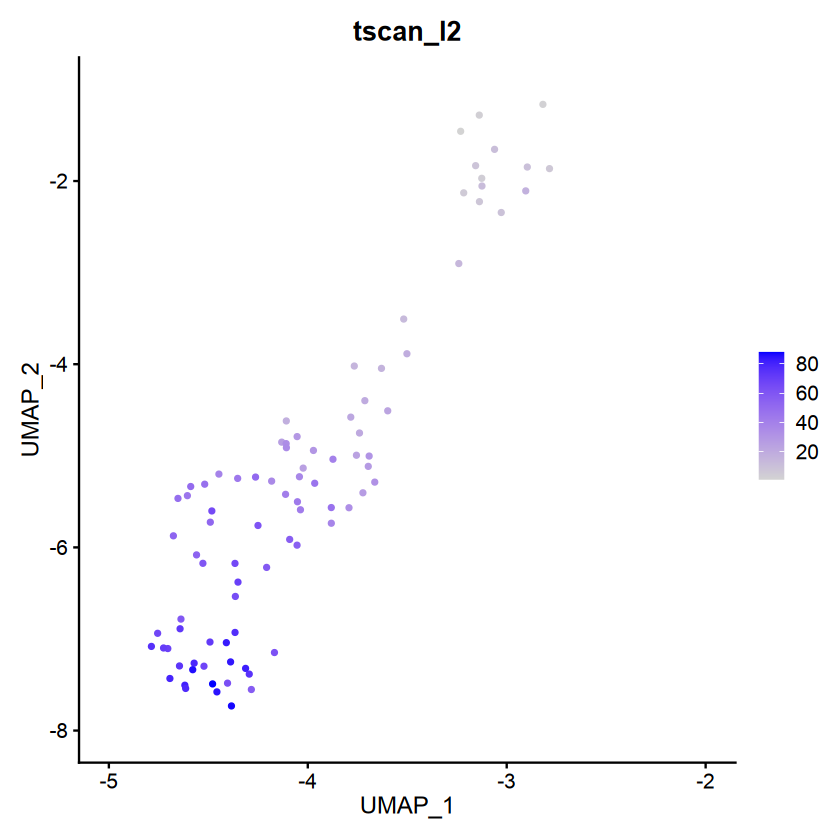

In [136]:
FeaturePlot(seurat_l2, features = c("tscan_l2"), reduction = "umap")

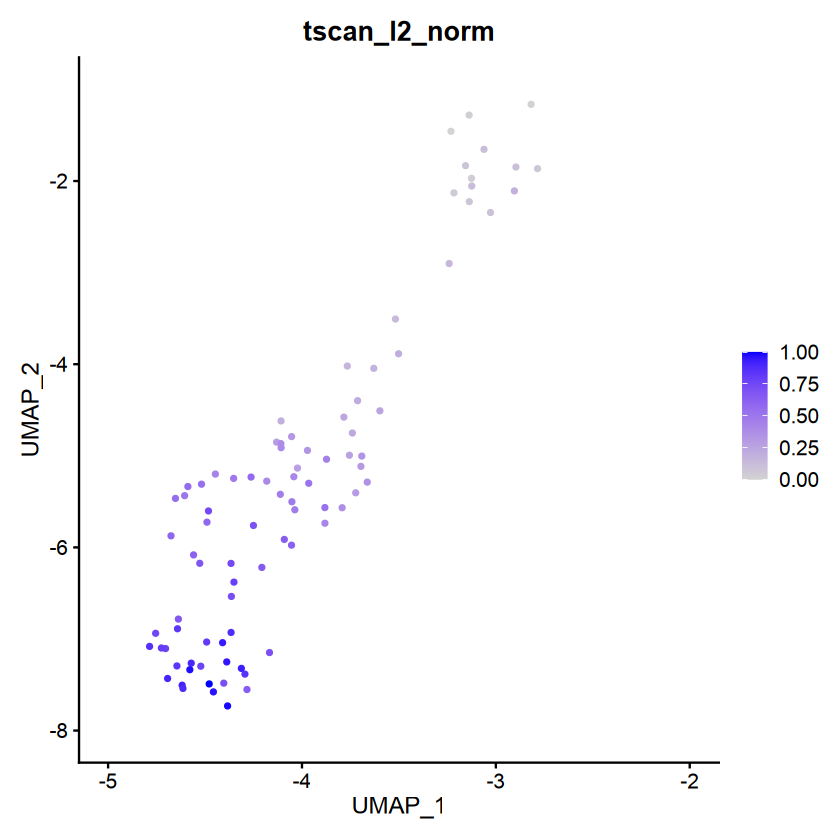

In [137]:
FeaturePlot(seurat_l2, features = c("tscan_l2_norm"), reduction = "umap")

## comparison

In [138]:
head(seurat_l2@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,⋯,monocle3_norm,monocle3,tscan_norm,tscan,dpt_l2_norm,dpt_l2,monocle3_l2_norm,monocle3_l2,tscan_l2_norm,tscan_l2
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell4,SeuratProject,520,51,491.5607,G,0.9773162,0.253593610,2,0.79346209,0.895615954,⋯,0.5711423,Inf,NA,NA,0.78160920,2.3487108,0.6551724,1.8323698,0.64367816,57
cell13,SeuratProject,509,55,331.0583,G,0.7399956,0.985150261,2,0.06850206,0.000433742,⋯,0.6352705,Inf,NA,NA,0.47126437,1.9958131,0.9655172,3.7657508,0.56321839,50
cell16,SeuratProject,468,51,339.5258,G,0.9518156,0.001950068,2,0.99838053,0.995740476,⋯,0.6513026,Inf,NA,NA,0.44827586,1.9541131,0.7816092,2.1663250,0.41379310,37
cell24,SeuratProject,485,53,391.7647,G,0.4192964,0.313405843,2,0.68862218,0.677010995,⋯,0.8817635,Inf,NA,NA,0.50574713,2.0187485,0.9540230,3.6828354,0.54022989,48
cell25,SeuratProject,487,53,358.9507,G,0.7446508,0.401667814,2,0.62101590,0.570963774,⋯,0.6753507,Inf,NA,NA,0.71264368,2.2574531,0.5747126,0.9835842,0.63218391,56
cell28,SeuratProject,335,44,314.2531,G,0.9393882,0.398638701,2,0.66586925,0.701320988,⋯,0.2845691,6.929171,0.511236,183,0.05747126,0.1284415,0.4252874,0.1208569,0.08045977,8


In [139]:
seurat_l2@meta.data$dpt_l2_rank = rank(seurat_l2@meta.data$dpt, ties.method = 'random', na.last = 'keep')
seurat_l2@meta.data$dpt_l2_norm <- scales::rescale(seurat_l2@meta.data$dpt_l2_rank,to = c(0,1))


In [140]:
seurat_l2@meta.data$sim_time_l2_rank = rank(seurat_l2@meta.data$sim_time, ties.method = 'random', na.last = 'keep')
seurat_l2@meta.data$sim_time_l2_norm <- scales::rescale(seurat_l2@meta.data$sim_time_l2_rank,to = c(0,1))

In [141]:
long_df <- gather(seurat_l2@meta.data[,c("dpt_l2_norm", "monocle3_l2_norm", "sim_time_l2_norm", "Cell_Type", "lineage")], key = "variable", value = "value", -sim_time_l2_norm, -Cell_Type, -lineage)
colnames(long_df) = c('sim_time_l2_norm', 'Cell_Type', 'lineage', 'method', 'value')
long_df$method[long_df$method=='dpt_l2_norm'] = "DPT"
long_df$method[long_df$method=='monocle3_l2_norm'] = "monocle3"
long_df$method[long_df$method=='tscan_l2_norm'] = "TSCAN"
head(long_df)

,sim_time_l2_norm,Cell_Type,lineage,method,value
,<dbl>,<chr>,<int>,<chr>,<dbl>
1,0.7701149,G,2,DPT,0.82758621
2,0.3333333,G,2,DPT,0.44827586
3,0.3563218,G,2,DPT,0.42528736
4,0.6206897,G,2,DPT,0.48275862
5,0.4367816,G,2,DPT,0.70114943
6,0.2413793,G,2,DPT,0.08045977


In [142]:
cor.test(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$dpt_l2_norm, na.rm=T)$estimate
cor.test(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$monocle3_l2_norm, na.rm=T)$estimate
cor.test(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$tscan_l2_norm, na.rm=T)$estimate


cor 
0.8707337

cor 
0.1565285

cor 
0.8587052

In [143]:
correlations <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$dpt_l2_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$monocle3_l2_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$tscan_l2_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlations)

,method,correlation
,<chr>,<dbl>
1,DPT,0.8707337
2,monocle3,0.1565285
3,TSCAN,0.8587052


In [144]:
correlation_with_gt <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l2@meta.data$r, seurat_l2@meta.data$dpt_l2_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l2@meta.data$r, seurat_l2@meta.data$monocle3_l2_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l2@meta.data$r, seurat_l2@meta.data$tscan_l2_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlation_with_gt)

,method,correlation
,<chr>,<dbl>
1,DPT,0.01518087
2,monocle3,0.02898806
3,TSCAN,0.03097813


In [145]:
correlations_ = correlation_with_gt
correlations_$lineage = "lineage2"
all_correlation_with_gt = rbind(all_correlation_with_gt, correlations_)
all_correlation_with_gt

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.990000000,all
DPT,0.020000000,all
monocle3,0.010000000,all
TSCAN,0.010000000,all
DPT,0.017018559,lineage1
monocle3,0.003354334,lineage1
TSCAN,0.016757436,lineage1
DPT,0.015180867,lineage2
monocle3,0.028988060,lineage2


In [146]:
long_df <- left_join(long_df, correlations, by = "method")
head(long_df)

,sim_time_l2_norm,Cell_Type,lineage,method,value,correlation
,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,0.7701149,G,2,DPT,0.82758621,0.8707337
2,0.3333333,G,2,DPT,0.44827586,0.8707337
3,0.3563218,G,2,DPT,0.42528736,0.8707337
4,0.6206897,G,2,DPT,0.48275862,0.8707337
5,0.4367816,G,2,DPT,0.70114943,0.8707337
6,0.2413793,G,2,DPT,0.08045977,0.8707337


Saving 6.67 x 6.67 in image


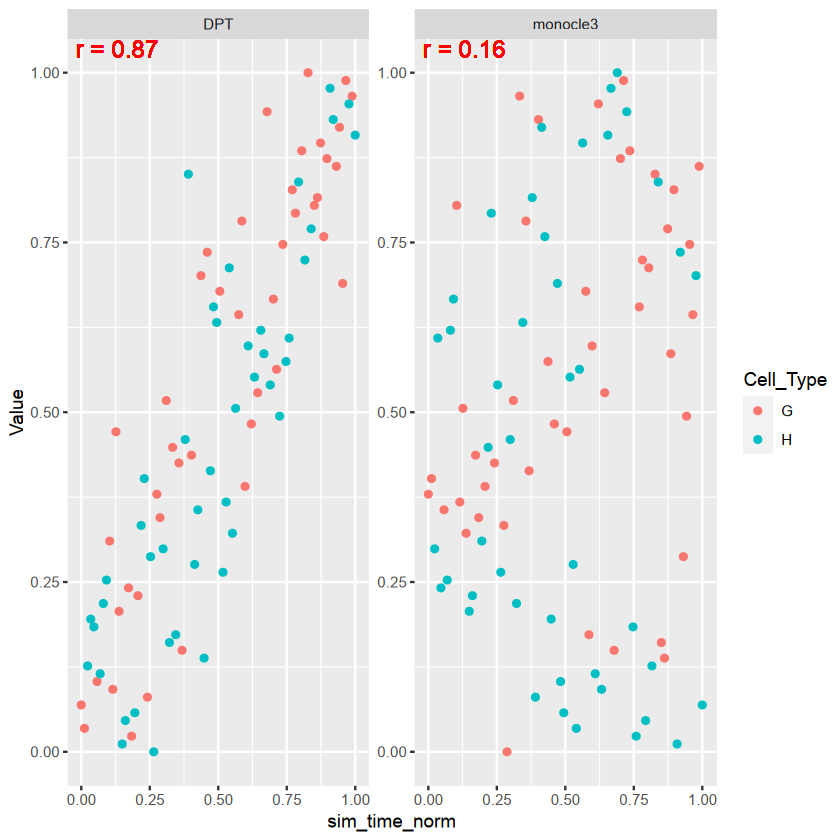

In [147]:
ggplot(long_df, aes(x = sim_time_l2_norm, y = value, color=Cell_Type, palette="Set1")) + 
  geom_point() + 
  facet_wrap(~method, scales = "free") +
  geom_text(aes(label = paste("r =", round(correlation, 2))), x = -Inf, y = Inf, hjust = -0.1, vjust = 1.1, color = "red", size = 5) +
  xlab("sim_time_norm") + 
  ylab("Value")
ggsave("Pseudotime_lineage1_comparison_cell_type.pdf")

# Lineage 3

## subset sce and seurat

In [148]:
sim_data_l3 <- sim_data[,sim_data@colData$lineage == 3]

In [149]:
dim(sim_data_l3)

[1] 100 103

In [150]:
head(ss0@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,RNA_snn_res.2,seurat_clusters,sim_time_rank,sim_time_norm,dpt_norm,dpt,monocle3_norm,monocle3,tscan_norm,tscan
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,698,60,1096.0238,I,0.1899555,0.7234187,3,0.3400232,0.19909275,4,4,497,0.9939880,0.7314629,19.494454,0.6793587,Inf,0.1685393,61
cell2,SeuratProject,1021,78,852.2690,A,0.8986162,0.8862130,1,0.2352948,0.04155392,2,2,470,0.9398798,0.9118236,26.019171,0.8436874,Inf,NA,NA
cell3,SeuratProject,364,56,437.9376,I,0.1772525,0.5725945,3,0.4814236,0.44504909,1,1,344,0.6873747,0.6372745,15.455340,0.6192385,Inf,0.2977528,107
cell4,SeuratProject,520,51,491.5607,G,0.9773162,0.2535936,2,0.7934621,0.89561595,8,8,392,0.7835671,0.4829659,9.176393,0.5711423,Inf,NA,NA
cell5,SeuratProject,917,74,475.7619,A,0.9611189,0.9822358,1,0.1899959,0.01498122,2,2,374,0.7474950,0.9058116,25.956647,0.6633267,Inf,NA,NA
cell6,SeuratProject,783,62,484.9720,I,0.2361229,0.8074413,3,0.2451217,0.10953713,4,4,384,0.7675351,0.7695391,19.742992,0.3687375,Inf,0.1235955,45


In [151]:
seurat_l3 = subset(ss0, cells=rownames(ss0@meta.data[ss0@meta.data$lineage == 3,]))

In [152]:
dim(seurat_l3)

[1] 100 103

## DPT

In [153]:
dm.use.3 <- DiffusionMap(data = sim_data_l3)

Warning message in (function (data, k, ..., query = NULL, distance = c("euclidean", :
“find_knn does not yet support sparse matrices, converting data to a dense matrix.”


In [154]:
#cell326
rownames(seurat_l3@meta.data[seurat_l3@meta.data$sim_time==min(seurat_l3@meta.data$sim_time),])


[1] "cell326"

In [155]:
rownames(seurat_l3@meta.data[seurat_l3@meta.data$sim_time==max(seurat_l3@meta.data$sim_time),])
#cell490

[1] "cell490"

In [156]:
seurat_l3[['dmap']] <- CreateDimReducObject(embeddings = dm.use.3@eigenvectors,
                                            assay = 'RNA',
                                            stdev = dm.use.3@eigenvalues,
                                            key = 'DC_')

In [157]:
root.use = c('cell326','cell490')

dpt.use.3 = DPT(dm.use.3,tips = match(root.use,rownames(dm.use.3@eigenvectors)))
dpt_l3_rank = rank(dpt.use.3$dpt,ties.method = 'random', na.last = 'keep')
seurat_l3@meta.data$dpt_l3_norm <- scales::rescale(dpt_l3_rank,to = c(0,1))
seurat_l3@meta.data$dpt_l3 = dpt.use.3$dpt

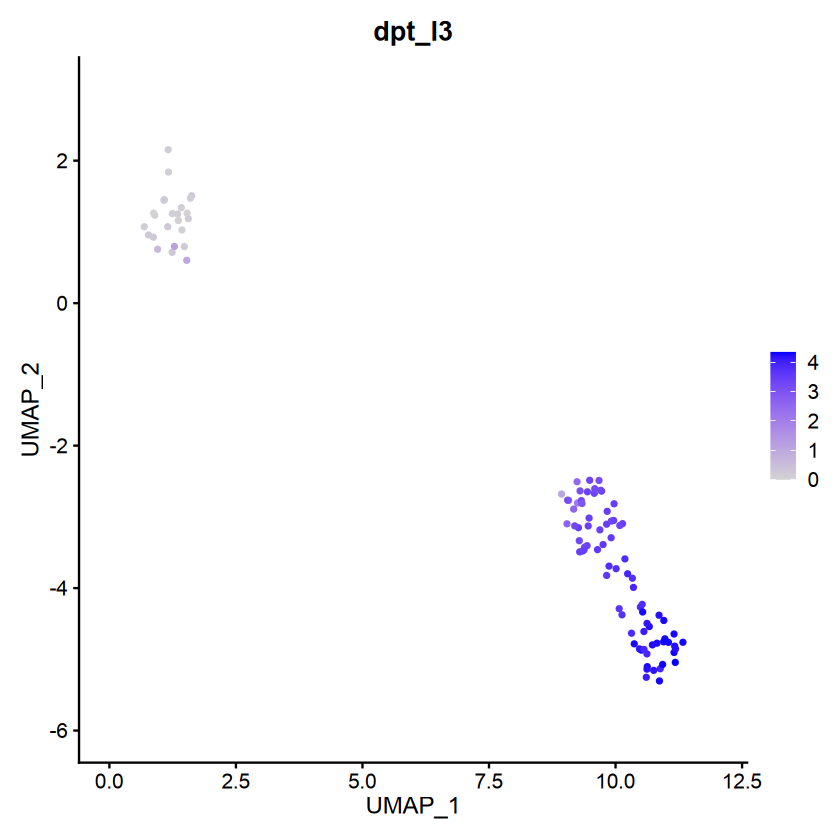

In [158]:
FeaturePlot(seurat_l3, features = c("dpt_l3"), reduction = "umap")

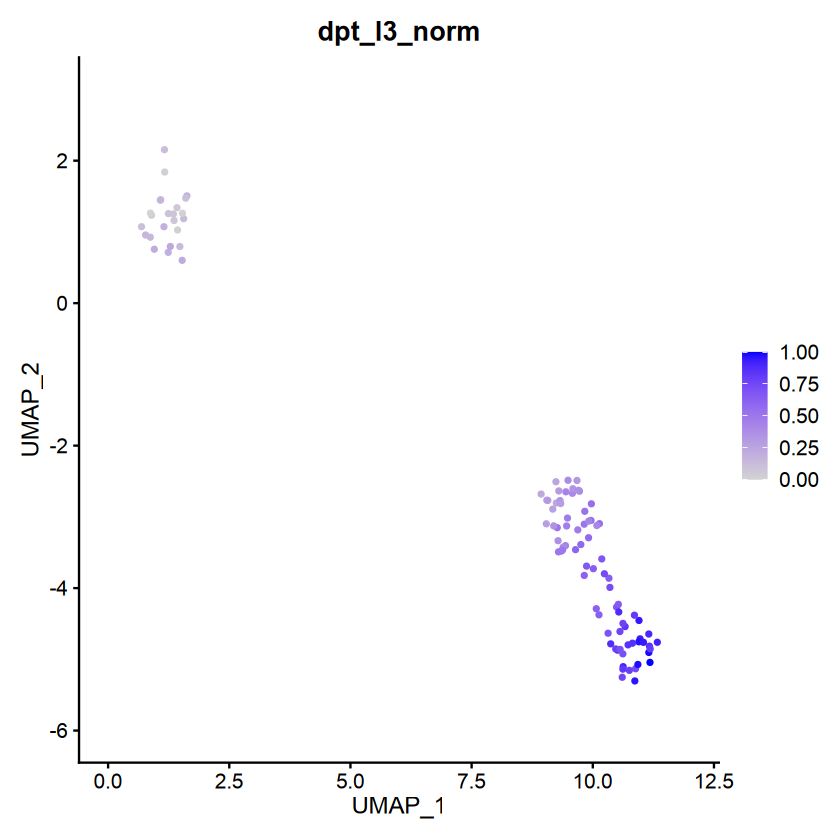

In [159]:
FeaturePlot(seurat_l3, features = c("dpt_l3_norm"), reduction = "umap")

## monocle

In [160]:
gene_annotation <- as.data.frame(sim_data_l3@assays@data@listData$counts@Dimnames[[1]],
                                 row.names = sim_data_l3@assays@data@listData$counts@Dimnames[[1]])
colnames(gene_annotation) <- "gene_short_name"

cds <- new_cell_data_set(sim_data_l3@assays@data@listData$counts,
                         cell_metadata = sim_data_l3@colData,
                         gene_metadata = gene_annotation)

In [161]:
cds <- preprocess_cds(cds, method = "PCA", num_dim = 20)

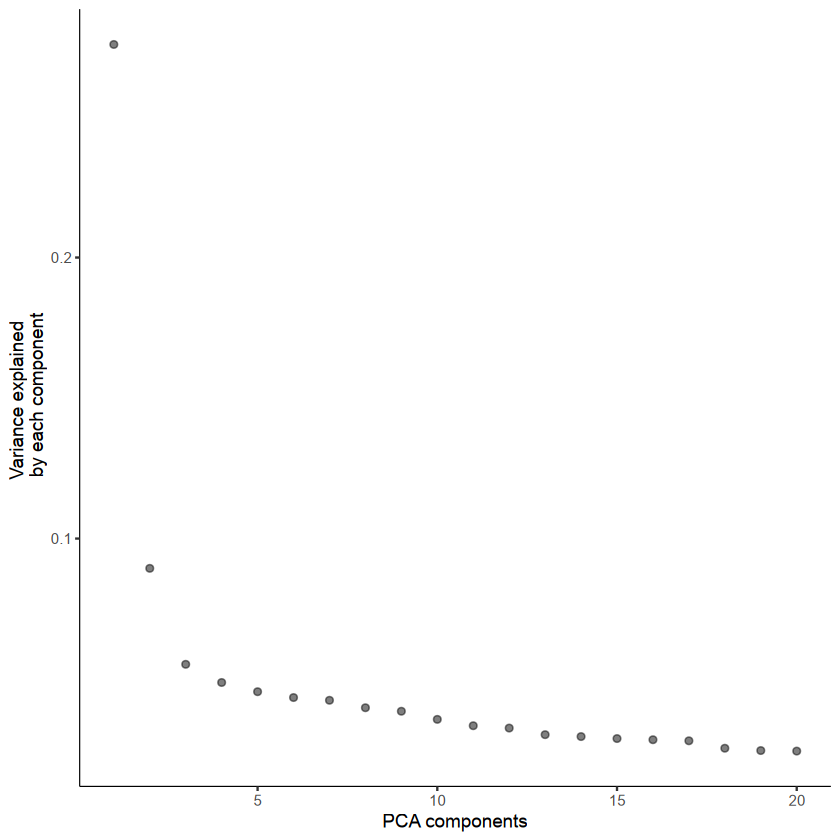

In [162]:
plot_pc_variance_explained(cds)

In [163]:
# cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA", umap.min_dist=0.5, umap.n_neighbors= 15L)
cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA")

In [164]:
cds <- cluster_cells(cds, reduction_method = "UMAP")

In [165]:
cds <- learn_graph(cds, use_partition=TRUE)

In [166]:
cds <- order_cells(cds, root_cells=root.use)

In [167]:
pseudotime <- pseudotime(cds) 

In [168]:
length(pseudotime)

[1] 103

In [169]:
monocle3_l3_rank <- rank(pseudotime,ties.method = 'random', na.last = 'keep')
monocle3_l3_norm <- scales::rescale(monocle3_l3_rank,to = c(0,1))

In [170]:
seurat_l3@meta.data$monocle3_l3_norm <- monocle3_l3_norm
seurat_l3@meta.data$monocle3_l3 <- pseudotime

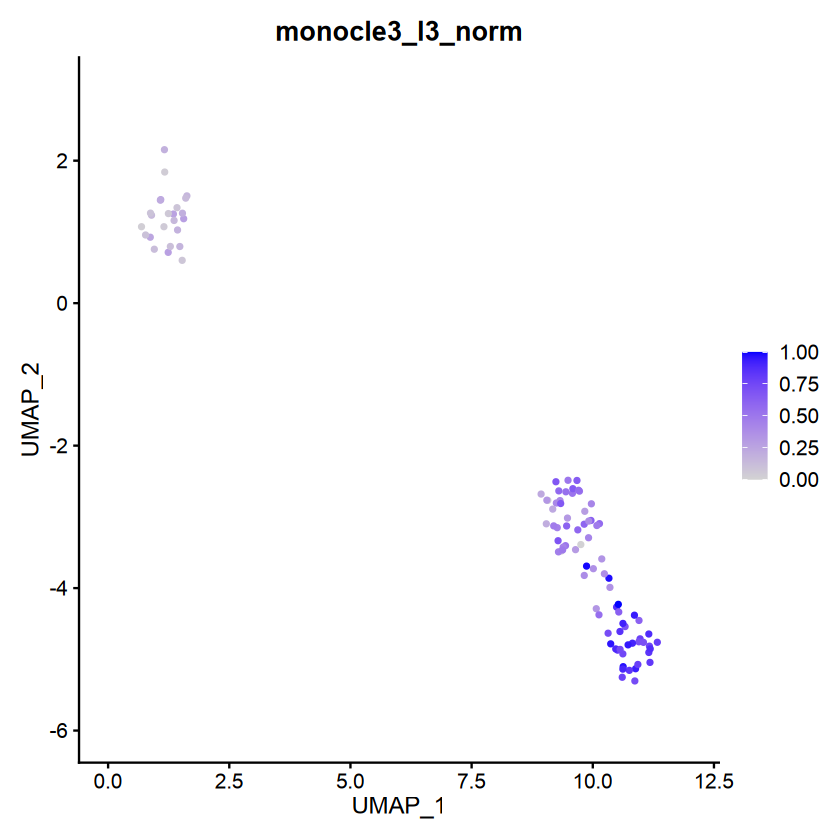

In [171]:
FeaturePlot(seurat_l3, features = c("monocle3_l3_norm"), reduction = "umap")

## TSCAN

In [172]:
library(TSCAN)

In [173]:
exp <- as.matrix(seurat_l3@assays$RNA@data)
procdata <- preprocess(exp, minexpr_value = 0, minexpr_percent = 0.001, cvcutoff = 0.01)


In [174]:
lpsmclust <- exprmclust(procdata)
tscan_order = TSCANorder(lpsmclust)

In [175]:
str(lpsmclust, 2)

List of 4
 $ pcareduceres: num [1:103, 1:2] 2.12 -9.1 3.59 4.98 2.69 ...
  ..- attr(*, "dimnames")=List of 2
 $ MSTtree     :Class 'igraph'  hidden list of 10
  ..$ : num 3
  ..$ : logi FALSE
  ..$ : num [1:2] 1 2
  ..$ : num [1:2] 0 0
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ :List of 4
  ..$ :<environment: 0x55aacb6c7d80> 
 $ clusterid   : Named int [1:103] 1 2 1 3 1 2 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:103] "cell1" "cell3" "cell6" "cell8" ...
 $ clucenter   : num [1:3, 1:2] 1.624 -7.691 3.565 -1.889 0.623 ...


In [176]:
head(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell482,cell482,2,1
cell99,cell99,2,2
cell210,cell210,2,3
cell132,cell132,2,4
cell260,cell260,2,5
cell218,cell218,2,6


In [177]:
tail(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell323,cell323,3,98
cell453,cell453,3,99
cell152,cell152,3,100
cell8,cell8,3,101
cell385,cell385,3,102
cell346,cell346,3,103


In [178]:
tscan_order[rownames(seurat_l3@meta.data),"Pseudotime"]

[1]  46   7  61 101  35  19  30  26  45  66  11  77  70  16  21  50  37  95
 [19]  68  55  84  79  92  25   2  83  67  97  90  33  27  43   4  14 100  96
 [37]  60  91  13  51  18  80  41  34  39  94  57  89   3  48   6  12   9  82
 [55]  44  22  23   5  42  49  29  63  73  71  98  78  15  87 103  75  10  64
 [73]  47 102  65  56  54  85  28  31  81  36  52  24  40  17  59  72  86  88
 [91]  99  76  69  32  62  74  38   8   1  20  58  53  93

In [179]:
tscan_l3_rank = rank(tscan_order[rownames(seurat_l3@meta.data),"Pseudotime"], ties.method = 'random', na.last = 'keep')
tscan_l3_norm = scales::rescale(tscan_l3_rank,to = c(0,1))
seurat_l3@meta.data$tscan_l3_norm = tscan_l3_norm
seurat_l3@meta.data$tscan_l3 = tscan_order[rownames(seurat_l3@meta.data),"Pseudotime"]


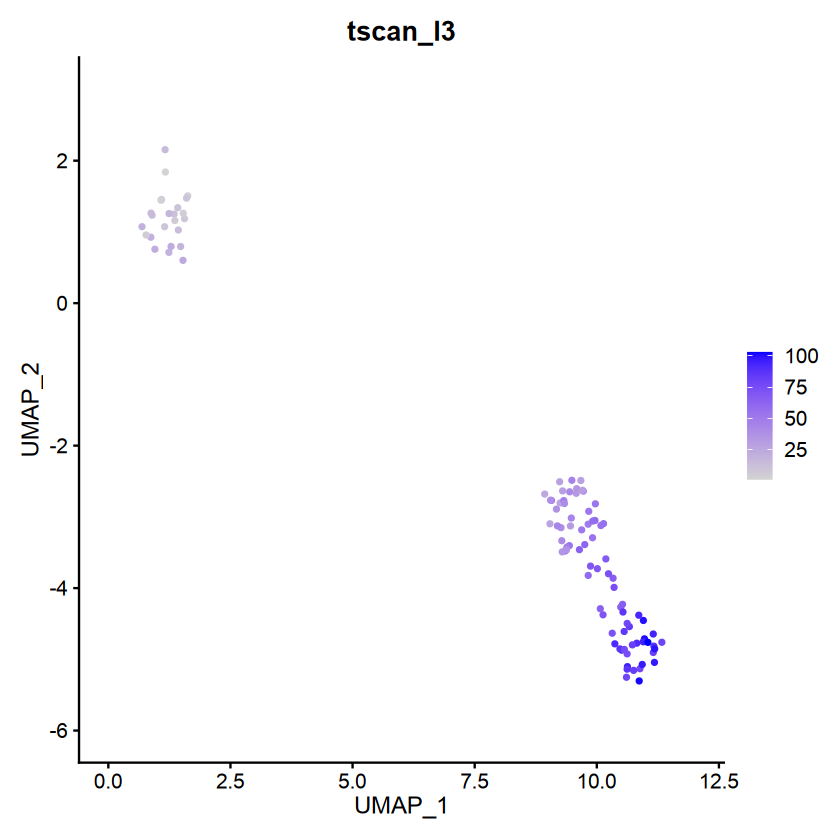

In [180]:
FeaturePlot(seurat_l3, features = c("tscan_l3"), reduction = "umap")

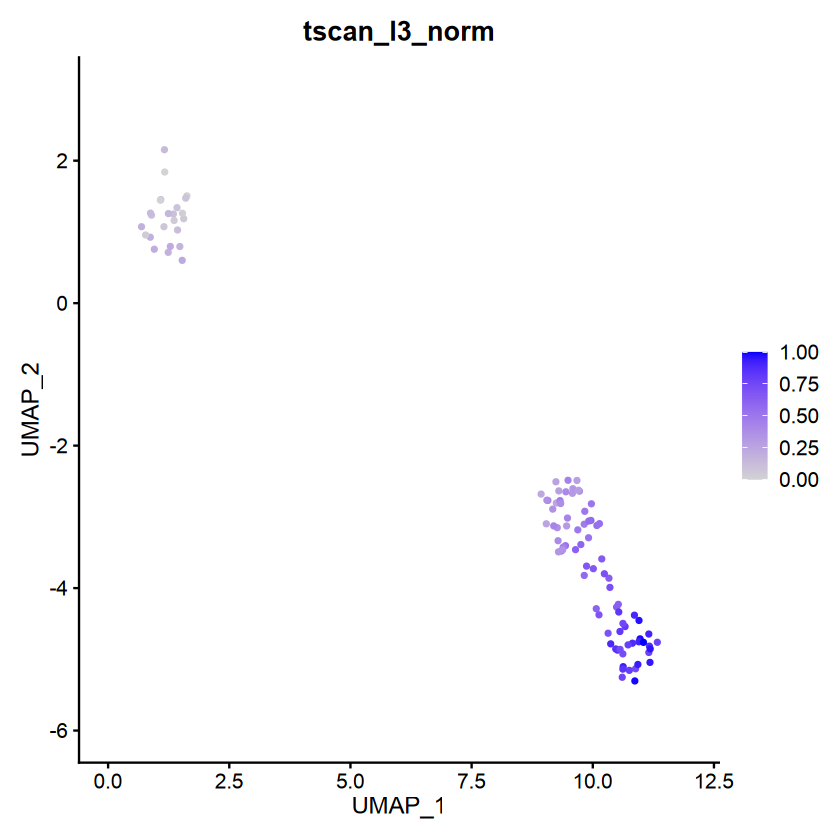

In [181]:
FeaturePlot(seurat_l3, features = c("tscan_l3_norm"), reduction = "umap")

## comparison

In [182]:
head(seurat_l2@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,⋯,tscan,dpt_l2_norm,dpt_l2,monocle3_l2_norm,monocle3_l2,tscan_l2_norm,tscan_l2,dpt_l2_rank,sim_time_l2_rank,sim_time_l2_norm
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
cell4,SeuratProject,520,51,491.5607,G,0.9773162,0.253593610,2,0.79346209,0.895615954,⋯,NA,0.82758621,2.3487108,0.6551724,1.8323698,0.64367816,57,73,68,0.7701149
cell13,SeuratProject,509,55,331.0583,G,0.7399956,0.985150261,2,0.06850206,0.000433742,⋯,NA,0.44827586,1.9958131,0.9655172,3.7657508,0.56321839,50,40,30,0.3333333
cell16,SeuratProject,468,51,339.5258,G,0.9518156,0.001950068,2,0.99838053,0.995740476,⋯,NA,0.42528736,1.9541131,0.7816092,2.1663250,0.41379310,37,38,32,0.3563218
cell24,SeuratProject,485,53,391.7647,G,0.4192964,0.313405843,2,0.68862218,0.677010995,⋯,NA,0.48275862,2.0187485,0.9540230,3.6828354,0.54022989,48,43,55,0.6206897
cell25,SeuratProject,487,53,358.9507,G,0.7446508,0.401667814,2,0.62101590,0.570963774,⋯,NA,0.70114943,2.2574531,0.5747126,0.9835842,0.63218391,56,62,39,0.4367816
cell28,SeuratProject,335,44,314.2531,G,0.9393882,0.398638701,2,0.66586925,0.701320988,⋯,183,0.08045977,0.1284415,0.4252874,0.1208569,0.08045977,8,8,22,0.2413793


In [183]:
seurat_l3@meta.data$dpt_l3_rank = rank(seurat_l3@meta.data$dpt, ties.method = 'random', na.last = 'keep')
seurat_l3@meta.data$dpt_l3_norm <- scales::rescale(seurat_l3@meta.data$dpt_l3_rank,to = c(0,1))


In [184]:
seurat_l3@meta.data$sim_time_l3_rank = rank(seurat_l3@meta.data$sim_time, ties.method = 'random', na.last = 'keep')
seurat_l3@meta.data$sim_time_l3_norm <- scales::rescale(seurat_l3@meta.data$sim_time_l3_rank,to = c(0,1))


In [185]:
long_df <- gather(seurat_l3@meta.data[,c("dpt_l3_norm", "monocle3_l3_norm", "sim_time_l3_norm", "Cell_Type", "lineage")], key = "variable", value = "value", -sim_time_l3_norm, -Cell_Type, -lineage)
colnames(long_df) = c('sim_time_l3_norm', 'Cell_Type', 'lineage', 'method', 'value')
long_df$method[long_df$method=='dpt_l3_norm'] = "DPT"
long_df$method[long_df$method=='monocle3_l3_norm'] = "monocle3"
long_df$method[long_df$method=='tscan_l3_norm'] = "TSCAN"
head(long_df)

,sim_time_l3_norm,Cell_Type,lineage,method,value
,<dbl>,<chr>,<int>,<chr>,<dbl>
1,0.99019608,I,3,DPT,0.3529412
2,0.29411765,I,3,DPT,0.1274510
3,0.45098039,I,3,DPT,0.5294118
4,0.94117647,I,3,DPT,0.8627451
5,0.21568627,I,3,DPT,0.5000000
6,0.08823529,I,3,DPT,0.1666667


In [186]:
cor.test(seurat_l3@meta.data$sim_time_l3_norm, seurat_l3@meta.data$dpt_l3_norm, na.rm=T)$estimate
cor.test(seurat_l3@meta.data$sim_time_l3_norm, seurat_l3@meta.data$monocle3_l3_norm, na.rm=T)$estimate
cor.test(seurat_l3@meta.data$sim_time_l3_norm, seurat_l3@meta.data$tscan_l3_norm, na.rm=T)$estimate


cor 
0.7311756

cor 
0.6831701

cor 
0.7587972

In [187]:
correlations <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l3@meta.data$sim_time_l3_norm, seurat_l3@meta.data$dpt_l3_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l3@meta.data$sim_time_l3_norm, seurat_l3@meta.data$monocle3_l3_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l3@meta.data$sim_time_l3_norm, seurat_l3@meta.data$tscan_l3_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlations)

,method,correlation
,<chr>,<dbl>
1,DPT,0.7311756
2,monocle3,0.6831701
3,TSCAN,0.7587972


In [188]:
head(seurat_l3@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,⋯,tscan,dpt_l3_norm,dpt_l3,monocle3_l3_norm,monocle3_l3,tscan_l3_norm,tscan_l3,dpt_l3_rank,sim_time_l3_rank,sim_time_l3_norm
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
cell1,SeuratProject,698,60,1096.0238,I,0.18995548,0.7234187,3,0.3400232,0.19909275,⋯,61,0.3529412,3.3383037,0.50000000,1.5004421,0.44117647,46,37,102,0.99019608
cell3,SeuratProject,364,56,437.9376,I,0.17725248,0.5725945,3,0.4814236,0.44504909,⋯,107,0.1274510,0.1857672,0.28431373,0.2294327,0.05882353,7,14,31,0.29411765
cell6,SeuratProject,783,62,484.9720,I,0.23612290,0.8074413,3,0.2451217,0.10953713,⋯,45,0.5294118,3.5824615,0.01960784,0.1689272,0.58823529,61,55,47,0.45098039
cell8,SeuratProject,782,63,1045.9010,I,0.61367455,0.8106284,3,0.1997128,0.04398621,⋯,7,0.8627451,4.2998833,0.78431373,3.0912068,0.98039216,101,89,97,0.94117647
cell17,SeuratProject,755,60,420.0320,I,0.17490594,0.9580047,3,0.1335655,0.03861304,⋯,57,0.5000000,3.4590778,0.46078431,1.4663389,0.33333333,35,52,23,0.21568627
cell19,SeuratProject,389,52,359.3384,I,0.07828294,0.1343493,3,0.8859364,0.98745559,⋯,83,0.1666667,0.2769179,0.27450980,0.2290041,0.17647059,19,18,10,0.08823529


In [189]:
correlation_with_gt <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l3@meta.data$r, seurat_l3@meta.data$dpt_l3_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l3@meta.data$r, seurat_l3@meta.data$monocle3_l3_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l3@meta.data$r, seurat_l3@meta.data$tscan_l3_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlation_with_gt)

,method,correlation
,<chr>,<dbl>
1,DPT,0.05479287
2,monocle3,0.08352370
3,TSCAN,0.04535870


In [190]:
correlations_ = correlation_with_gt
correlations_$lineage = "lineage3"
all_correlation_with_gt = rbind(all_correlation_with_gt, correlations_)
all_correlation_with_gt

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.990000000,all
DPT,0.020000000,all
monocle3,0.010000000,all
TSCAN,0.010000000,all
DPT,0.017018559,lineage1
monocle3,0.003354334,lineage1
TSCAN,0.016757436,lineage1
DPT,0.015180867,lineage2
monocle3,0.028988060,lineage2


In [191]:
long_df <- left_join(long_df, correlations, by = "method")
head(long_df)

,sim_time_l3_norm,Cell_Type,lineage,method,value,correlation
,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,0.99019608,I,3,DPT,0.3529412,0.7311756
2,0.29411765,I,3,DPT,0.1274510,0.7311756
3,0.45098039,I,3,DPT,0.5294118,0.7311756
4,0.94117647,I,3,DPT,0.8627451,0.7311756
5,0.21568627,I,3,DPT,0.5000000,0.7311756
6,0.08823529,I,3,DPT,0.1666667,0.7311756


Saving 6.67 x 6.67 in image


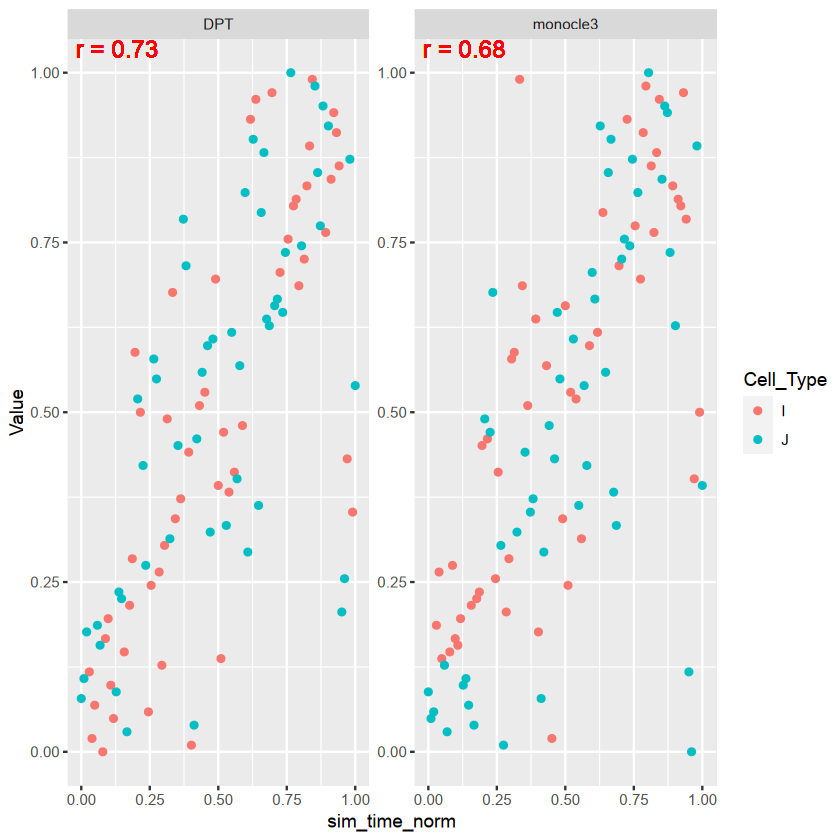

In [192]:
ggplot(long_df, aes(x = sim_time_l3_norm, y = value, color=Cell_Type, palette="Set1")) + 
  geom_point() + 
  facet_wrap(~method, scales = "free") +
  geom_text(aes(label = paste("r =", round(correlation, 2))), x = -Inf, y = Inf, hjust = -0.1, vjust = 1.1, color = "red", size = 5) +
  xlab("sim_time_norm") + 
  ylab("Value")
ggsave("Pseudotime_lineage1_comparison_cell_type.pdf")

# Output

## correlation with r(ground truth)

In [193]:
all_correlation_with_gt$correlation = round(all_correlation_with_gt$correlation, 2)
all_correlation_with_gt

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.99,all
DPT,0.02,all
monocle3,0.01,all
TSCAN,0.01,all
DPT,0.02,lineage1
monocle3,0.00,lineage1
TSCAN,0.02,lineage1
DPT,0.02,lineage2
monocle3,0.03,lineage2


In [194]:
write.csv(all_correlation_with_gt,'Spearman_correlation_with_truth_all_lineage.csv')

## pseudotime

In [195]:
head(ss0@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,RNA_snn_res.2,seurat_clusters,sim_time_rank,sim_time_norm,dpt_norm,dpt,monocle3_norm,monocle3,tscan_norm,tscan
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,698,60,1096.0238,I,0.1899555,0.7234187,3,0.3400232,0.19909275,4,4,497,0.9939880,0.7314629,19.494454,0.6793587,Inf,0.1685393,61
cell2,SeuratProject,1021,78,852.2690,A,0.8986162,0.8862130,1,0.2352948,0.04155392,2,2,470,0.9398798,0.9118236,26.019171,0.8436874,Inf,NA,NA
cell3,SeuratProject,364,56,437.9376,I,0.1772525,0.5725945,3,0.4814236,0.44504909,1,1,344,0.6873747,0.6372745,15.455340,0.6192385,Inf,0.2977528,107
cell4,SeuratProject,520,51,491.5607,G,0.9773162,0.2535936,2,0.7934621,0.89561595,8,8,392,0.7835671,0.4829659,9.176393,0.5711423,Inf,NA,NA
cell5,SeuratProject,917,74,475.7619,A,0.9611189,0.9822358,1,0.1899959,0.01498122,2,2,374,0.7474950,0.9058116,25.956647,0.6633267,Inf,NA,NA
cell6,SeuratProject,783,62,484.9720,I,0.2361229,0.8074413,3,0.2451217,0.10953713,4,4,384,0.7675351,0.7695391,19.742992,0.3687375,Inf,0.1235955,45


In [196]:
colnames(ss0@meta.data)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "sim_time"       
 [5] "Cell_Type"       "x"               "y"               "lineage"        
 [9] "r"               "Cell_NTScore"    "RNA_snn_res.2"   "seurat_clusters"
[13] "sim_time_rank"   "sim_time_norm"   "dpt_norm"        "dpt"            
[17] "monocle3_norm"   "monocle3"        "tscan_norm"      "tscan"

In [197]:
head(seurat_l1@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,⋯,tscan,dpt_l1_norm,dpt_l1,monocle3_l1_norm,monocle3_l1,tscan_l1_norm,tscan_l1,dpt_l1_rank,sim_time_l1_rank,sim_time_l1_norm
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
cell2,SeuratProject,1021,78,852.26897,A,0.89861622,0.8862130,1,0.23529476,0.0415539169,⋯,NA,0.85714286,25.2015862,0.08441558,0.2153083,0.1363636,43,265,298,0.9642857
cell5,SeuratProject,917,74,475.76186,A,0.96111891,0.9822358,1,0.18999592,0.0149812209,⋯,NA,0.84740260,25.0954448,0.35064935,0.8187723,0.1623377,51,262,262,0.8474026
cell7,SeuratProject,318,41,183.11251,A,0.09894517,0.9422671,1,0.18829206,0.0616074376,⋯,231,0.43506494,5.2565138,0.50649351,1.9460485,0.5422078,168,135,139,0.4480519
cell9,SeuratProject,477,54,342.05375,A,0.10747460,0.9865250,1,0.14518208,0.0434847377,⋯,115,0.62337662,13.7712143,0.82792208,5.2249516,0.3506494,109,193,212,0.6850649
cell10,SeuratProject,257,38,130.51467,A,0.85649273,0.9077020,1,0.19464788,0.0206733804,⋯,267,0.29220779,4.9493902,0.49025974,1.7554534,0.7110390,220,91,94,0.3019481
cell11,SeuratProject,191,27,50.45716,A,0.59744699,0.9673994,1,0.04170057,0.0005034464,⋯,326,0.09090909,0.5921364,0.30844156,0.2656887,0.9090909,281,29,32,0.1006494


In [198]:
pseudotime_output = ss0@meta.data[,c('x', 'y', 'r', 'lineage', 'Cell_NTScore', 'dpt', 'monocle3','tscan','dpt_norm', 'monocle3_norm','tscan_norm')]
head(pseudotime_output)


,x,y,r,lineage,Cell_NTScore,dpt,monocle3,tscan,dpt_norm,monocle3_norm,tscan_norm
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,0.1899555,0.7234187,0.3400232,3,0.19909275,19.494454,Inf,61,0.7314629,0.6793587,0.1685393
cell2,0.8986162,0.8862130,0.2352948,1,0.04155392,26.019171,Inf,NA,0.9118236,0.8436874,NA
cell3,0.1772525,0.5725945,0.4814236,3,0.44504909,15.455340,Inf,107,0.6372745,0.6192385,0.2977528
cell4,0.9773162,0.2535936,0.7934621,2,0.89561595,9.176393,Inf,NA,0.4829659,0.5711423,NA
cell5,0.9611189,0.9822358,0.1899959,1,0.01498122,25.956647,Inf,NA,0.9058116,0.6633267,NA
cell6,0.2361229,0.8074413,0.2451217,3,0.10953713,19.742992,Inf,45,0.7695391,0.3687375,0.1235955


In [199]:
pseudotime_output$dpt_l1 = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('dpt_l1')]
pseudotime_output$monocle3_l1 = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('monocle3_l1')]
pseudotime_output$tscan_l1 = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('tscan_l1')]
pseudotime_output$dpt_l1_norm = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('dpt_l1_norm')]
pseudotime_output$monocle3_l1_norm = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('monocle3_l1_norm')]
pseudotime_output$tscan_l1_norm = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('tscan_l1_norm')]


In [200]:
pseudotime_output$dpt_l2 = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('dpt_l2')]
pseudotime_output$monocle3_l2 = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('monocle3_l2')]
pseudotime_output$tscan_l2 = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('tscan_l2')]
pseudotime_output$dpt_l2_norm = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('dpt_l2_norm')]
pseudotime_output$monocle3_l2_norm = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('monocle3_l2_norm')]
pseudotime_output$tscan_l2_norm = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('tscan_l2_norm')]


In [201]:
pseudotime_output$dpt_l3 = seurat_l3@meta.data[match(rownames(pseudotime_output), rownames(seurat_l3@meta.data)), c('dpt_l3')]
pseudotime_output$monocle3_l3 = seurat_l3@meta.data[match(rownames(pseudotime_output), rownames(seurat_l3@meta.data)), c('monocle3_l3')]
pseudotime_output$tscan_l3 = seurat_l3@meta.data[match(rownames(pseudotime_output), rownames(seurat_l3@meta.data)), c('tscan_l3')]
pseudotime_output$dpt_l3_norm = seurat_l3@meta.data[match(rownames(pseudotime_output), rownames(seurat_l3@meta.data)), c('dpt_l3_norm')]
pseudotime_output$monocle3_l3_norm = seurat_l3@meta.data[match(rownames(pseudotime_output), rownames(seurat_l3@meta.data)), c('monocle3_l3_norm')]
pseudotime_output$tscan_l3_norm = seurat_l3@meta.data[match(rownames(pseudotime_output), rownames(seurat_l3@meta.data)), c('tscan_l3_norm')]


In [202]:
head(pseudotime_output)

,x,y,r,lineage,Cell_NTScore,dpt,monocle3,tscan,dpt_norm,monocle3_norm,⋯,tscan_l2,dpt_l2_norm,monocle3_l2_norm,tscan_l2_norm,dpt_l3,monocle3_l3,tscan_l3,dpt_l3_norm,monocle3_l3_norm,tscan_l3_norm
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,0.1899555,0.7234187,0.3400232,3,0.19909275,19.494454,Inf,61,0.7314629,0.6793587,⋯,NA,NA,NA,NA,3.3383037,1.5004421,46,0.3529412,0.50000000,0.44117647
cell2,0.8986162,0.8862130,0.2352948,1,0.04155392,26.019171,Inf,NA,0.9118236,0.8436874,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
cell3,0.1772525,0.5725945,0.4814236,3,0.44504909,15.455340,Inf,107,0.6372745,0.6192385,⋯,NA,NA,NA,NA,0.1857672,0.2294327,7,0.1274510,0.28431373,0.05882353
cell4,0.9773162,0.2535936,0.7934621,2,0.89561595,9.176393,Inf,NA,0.4829659,0.5711423,⋯,57,0.8275862,0.6551724,0.6436782,NA,NA,NA,NA,NA,NA
cell5,0.9611189,0.9822358,0.1899959,1,0.01498122,25.956647,Inf,NA,0.9058116,0.6633267,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
cell6,0.2361229,0.8074413,0.2451217,3,0.10953713,19.742992,Inf,45,0.7695391,0.3687375,⋯,NA,NA,NA,NA,3.5824615,0.1689272,61,0.5294118,0.01960784,0.58823529


In [203]:
colnames(pseudotime_output) = c('x', 'y', 'r', 'lineage', 'ONTraC',
                                'DPT', 'monocle3', 'TSCAN',
                                'DPT_norm', 'monocle3_norm', 'TSCAN_norm',
                                'DPT_l1', 'monocle3_l1', 'TSCAN_l1',
                                'DPT_l1_norm', 'monocle3_l1_norm', 'TSCAN_l1_norm',
                                'DPT_l2', 'monocle3_l2', 'TSCAN_l2',
                                'DPT_l2_norm', 'monocle3_l2_norm', 'TSCAN_l2_norm',
                                'DPT_l3', 'monocle3_l3', 'TSCAN_l3',
                                'DPT_l3_norm', 'monocle3_l3_norm', 'TSCAN_l3_norm')
head(pseudotime_output)


,x,y,r,lineage,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,⋯,TSCAN_l2,DPT_l2_norm,monocle3_l2_norm,TSCAN_l2_norm,DPT_l3,monocle3_l3,TSCAN_l3,DPT_l3_norm,monocle3_l3_norm,TSCAN_l3_norm
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,0.1899555,0.7234187,0.3400232,3,0.19909275,19.494454,Inf,61,0.7314629,0.6793587,⋯,NA,NA,NA,NA,3.3383037,1.5004421,46,0.3529412,0.50000000,0.44117647
cell2,0.8986162,0.8862130,0.2352948,1,0.04155392,26.019171,Inf,NA,0.9118236,0.8436874,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
cell3,0.1772525,0.5725945,0.4814236,3,0.44504909,15.455340,Inf,107,0.6372745,0.6192385,⋯,NA,NA,NA,NA,0.1857672,0.2294327,7,0.1274510,0.28431373,0.05882353
cell4,0.9773162,0.2535936,0.7934621,2,0.89561595,9.176393,Inf,NA,0.4829659,0.5711423,⋯,57,0.8275862,0.6551724,0.6436782,NA,NA,NA,NA,NA,NA
cell5,0.9611189,0.9822358,0.1899959,1,0.01498122,25.956647,Inf,NA,0.9058116,0.6633267,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
cell6,0.2361229,0.8074413,0.2451217,3,0.10953713,19.742992,Inf,45,0.7695391,0.3687375,⋯,NA,NA,NA,NA,3.5824615,0.1689272,61,0.5294118,0.01960784,0.58823529


In [204]:
write.csv(pseudotime_output, "pseudotime_output.csv")

# sessionInfo

In [205]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 9.4 (Blue Onyx)

Matrix products: default
BLAS/LAPACK: /sc/arion/work/wangw32/conda-env/envs/seurat_v4/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.utf8        LC_NUMERIC=C              
 [3] LC_TIME=en_US.utf-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=en_US.utf-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=en_US.utf-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.utf-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] mclust_6.1                  slingshot_2.10.0           
 [3] TrajectoryUtils_1.10.1      princurve_2.1.6            
 [5] uwot_0.1.16                 Matrix_1.6-4               
 [7